New Years to-do
1. Overall
-Check which compounds have trivial names, kick out Rest (or anonymise)
-Replace with trivial names
-Residual Frac clusters
-Rename to RNAseq vs. Multiplexed RNAseq

3. Correlations
- Post production:Add Frac cluster and MoA on the side

4. Stripplot
- Post production: Do FRAC and cluster labels
- throw out pypy?

5. Embeddings
- Put in panels with Stripplot

8. Venn diagrams cut-offs
- Postprodution: Venns have to get smaller when theres less genes
- Put average gene lengths into description?

In [35]:
raw_or_norm = "raw"  # or "norm"

In [36]:

import pandas as pd
import numpy as np
import os

if raw_or_norm == "norm":
    # Load the normalized data
    df1 = pd.read_csv("batch1_full_norm_matrix_and_meta.csv", index_col=0)
    df2 = pd.read_csv("batch2_full_norm_matrix_and_meta_2.csv", index_col=0)
else:
    df1 = pd.read_csv("batch1_full_raw_matrix_and_meta.csv", index_col = 0)
    df1["Metadata_plate"] = "batch1_" + df1["Metadata_plate"].astype(str)
    df1["Metadata_batch"] = "batch1"
    df2 = pd.read_csv("batch2_full_raw_matrix_and_meta.csv", index_col = 0)
    df2["Metadata_plate"] = "batch2_" + df2["Metadata_plate"].astype(str)
    df2["Metadata_batch"] = "batch2"


In [37]:
df1["Metadata_plate"].unique()

array(['batch1_plate1_24h', 'batch1_plate2_6h', 'batch1_plate3_6h',
       'batch1_plate4_6h', 'batch1_plate5_24h', 'batch1_plate6_24h',
       'batch1_plate7_24h', 'batch1_plate1_6h', 'batch1_plate2_24h',
       'batch1_plate3_24h', 'batch1_plate4_24h', 'batch1_plate5_6h',
       'batch1_plate6_6h', 'batch1_plate7_6h', 'batch1_plate8_24h',
       'batch1_plate8_6h'], dtype=object)

In [38]:
if "Metadata_treatments" in df1.columns:
    # Rename the columns to match
    df1.rename(columns={"Metadata_treatments": "Metadata_treatment"}, inplace=True)
if "Metadata_treatments" in df2.columns:
    df2.rename(columns={"Metadata_treatments": "Metadata_treatment"}, inplace=True)

In [39]:
df = pd.concat([df1, df2], axis=0)
#df1, df2 = None, None  # Free memory

In [40]:
meta_df = pd.read_csv("bcs2treatment2once_BOTH_batch_picassoxbridge.csv")
meta_df.head()


Metadata_BCS      Clearname          Metadata_MoA
0           DMSO           DMSO                  DMSO
1  Azadirachitin  Azadirachitin             Apoptosis
2    BCS-AA10099    BCS-AA10099  Growth & Development
3    BCS-AA10137    BCS-AA10137           Respiration
4    BCS-AA10147    BCS-AA10147  Growth & Development

In [41]:
meta_df.shape

(121, 3)

In [42]:
moa_dict = dict(zip(meta_df["Metadata_BCS"], meta_df["Metadata_MoA"]))
clearname_dict = dict(zip(meta_df["Metadata_BCS"], meta_df["Clearname"]))
if "Metadata_Mode_of_Action" in df.columns:
    df.drop(columns=["Metadata_Mode_of_Action"], inplace=True)
df["Metadata_Mode_of_Action"] = np.nan
df["Metadata_Clearname"] = np.nan
df["Metadata_Mode_of_Action"] = df["Metadata_treatment"].map(moa_dict)
df["Metadata_Clearname"] = df["Metadata_treatment"].map(clearname_dict)
df["Metadata_timepoint"] = df["Metadata_timepoint"].astype(str).str.replace("h", "")

In [43]:
scanpy_normalisation = True
outlier_removal = True
exclude_higly_expressed = False
cut_samples_fraction = 0.05
cut_genes_fraction = 0.05

In [44]:
timepoints = [
    "6",
    "24",
]
outlier_plates = [
    #'plate3_24h',
    #"plate7_24h",
    #"plate8_6h",
    #"plate7_6h",
    #"plate7_8h"
    #"plate7_24h",
    #"plate4_6h"
]
outlier_moas = [
    #"Sucrose",
    #"Apoptosis",
    #"Uncoupler"
]

In [45]:
print(df.shape)
# df.rename(columns = {
#     "Metadata_MOA" : "Metadata_Mode_of_Action",
#     "Metadata_treatment": "Metadata_treatment",
# }, inplace = True)
df.loc[df["Metadata_treatment"] == "DMSO", "Metadata_concentration"] = 1


(2688, 16796)


In [46]:
df = df[df["Metadata_timepoint"].isin(timepoints)]
print(df.shape)
df = df[~df["Metadata_plate"].isin(outlier_plates)]
print(df.shape)
#df = df[~df["Metadata_Mode_of_Action"].isin(outlier_moas)]
df = df[~df["Metadata_Mode_of_Action"].isna()]
print(df.shape)
#df.loc[df["Metadata_treatment"] == "DMSO", "Metadata_timepoint"] = timepoints[0]

print(df.shape)

(2688, 16796)
(2688, 16796)
(2308, 16796)
(2308, 16796)


In [47]:
print(df[df["Metadata_treatment"]=="DMSO"]["Metadata_timepoint"].unique())
print(df[df["Metadata_treatment"]=="DMSO"]["Metadata_plate"].unique())

['6' '24']
['batch1_plate1_24h' 'batch1_plate2_6h' 'batch1_plate3_6h'
 'batch1_plate4_6h' 'batch1_plate5_24h' 'batch1_plate6_24h'
 'batch1_plate7_24h' 'batch1_plate1_6h' 'batch1_plate2_24h'
 'batch1_plate3_24h' 'batch1_plate4_24h' 'batch1_plate5_6h'
 'batch1_plate6_6h' 'batch1_plate7_6h' 'batch1_plate8_24h'
 'batch1_plate8_6h' 'batch2_plate1_24h' 'batch2_plate2_24h'
 'batch2_plate3_6h' 'batch2_plate4_6h' 'batch2_plate5_6h'
 'batch2_plate6_24h' 'batch2_plate1_6h' 'batch2_plate2_6h'
 'batch2_plate3_24h' 'batch2_plate4_24h' 'batch2_plate5_24h'
 'batch2_plate6_6h']


In [48]:
df["Metadata_concentration"].unique()
df["Metadata_timepoint"] = df["Metadata_timepoint"].astype(str)

In [49]:
df["Metadata_log_concentration"] = np.log10(df["Metadata_concentration"].astype(float).fillna(0))
df["Metadata_treat_moa"] = df["Metadata_Clearname"] + "  " + df["Metadata_treatment"] + "  " + df["Metadata_Mode_of_Action"] + " " + df["Metadata_timepoint"]

In [50]:
gene_columns = [ col for col  in df.columns if "Metadata" not in col]
metadata_columns = [ col for col  in df.columns if "Metadata" in col]

In [51]:
if scanpy_normalisation==False:
    # Select the 250 columns with the highest variance
    top_250_columns = list(df[gene_columns].var().nlargest(250).index)
    df = df[top_250_columns + metadata_columns]
    gene_columns = top_250_columns

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Array of categories
unique_prefixes = df["Metadata_Mode_of_Action"].unique()

# Generate a base color for each unique prefix
base_colors = sns.color_palette("Set2", n_colors=len(unique_prefixes))  # Use a distinct palette
# Create a dictionary mapping categories to colors
category_color_map = {cat: color for cat, color in zip(unique_prefixes, base_colors)}


In [53]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

def outlier_pca(df):
    # Assuming df is your DataFrame and cellranger_feats is a list of feature names
    meta_columns = df.columns[df.columns.str.startswith("Metadata_")]
    gene_columns = df.columns[~df.columns.str.startswith("Metadata_")]

    pca = PCA(n_components=2)  # We want to reduce to 2 dimensions for plotting
    principal_components = pca.fit_transform(df[gene_columns])

    envelope = IsolationForest(contamination="auto", n_jobs=-1, random_state=42)  # Adjust contamination as needed
    envelope.fit(df[gene_columns])
    pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
    pca_df["Metadata_treatment"] = list(df["Metadata_treatment"])
    pca_df["Metadata_log_concentration"] = list(df["Metadata_log_concentration"])

    pca_df["Metadata_Mode_of_Action"] = list(df["Metadata_Mode_of_Action"])
    outlier_list = envelope.predict(df[gene_columns])  # True for outliers
    pca_df["Outlier"] = outlier_list
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=pca_df,
        x="PC1",
        y="PC2",
        hue="Metadata_Mode_of_Action",
        palette="Set2",
        size="Metadata_log_concentration",
        # sizes=(20, 200),
        alpha=0.7,
    )
    ax = plt.gca()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    # Highlight outliers
    outliers = pca_df[pca_df["Outlier"] == -1]
    plt.scatter(
        outliers["PC1"],
        outliers["PC2"],
        color="black",
        edgecolor="black",
        label="Outliers",
        s=20,
        marker="x",
        alpha=0.5,
    )
    plt.show()
    df = df[outlier_list != -1]
    return df

/tmp/ipykernel_44593/4291621281.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


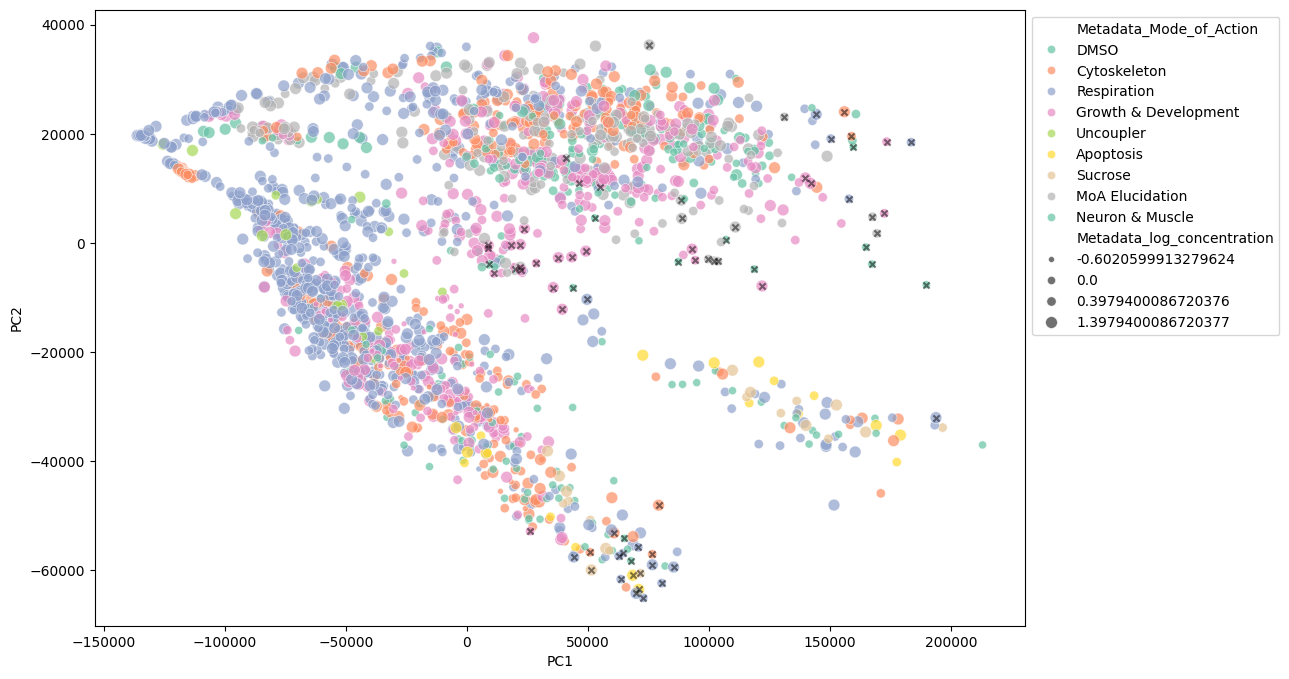

In [54]:
if outlier_removal:
    df = outlier_pca(df)

/home/ubuntu/miniconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


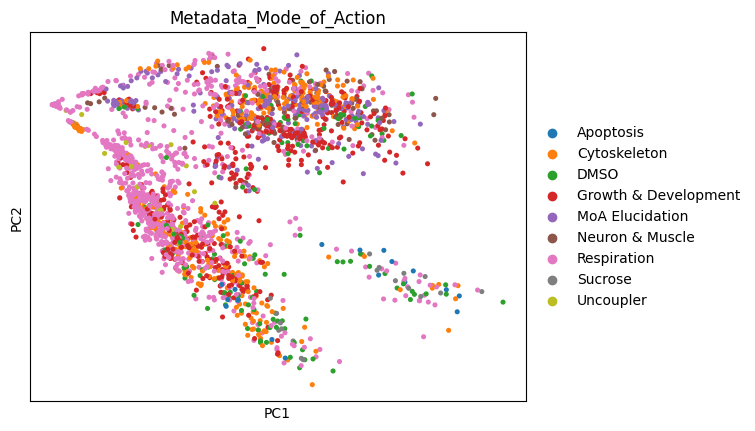

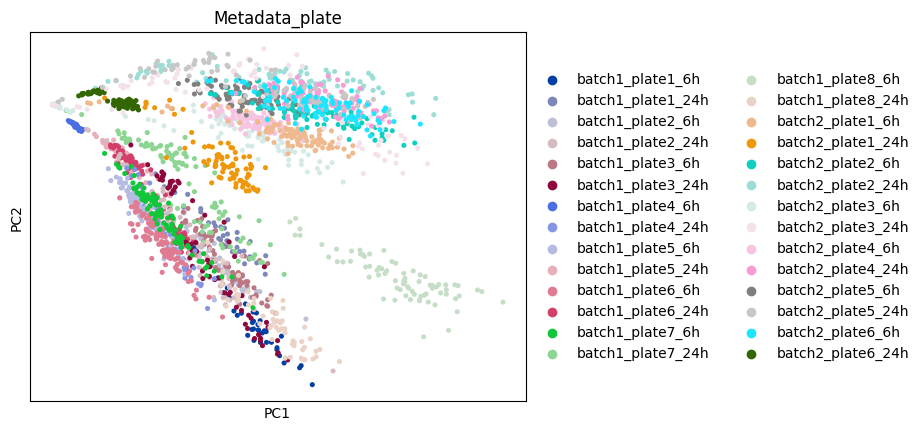

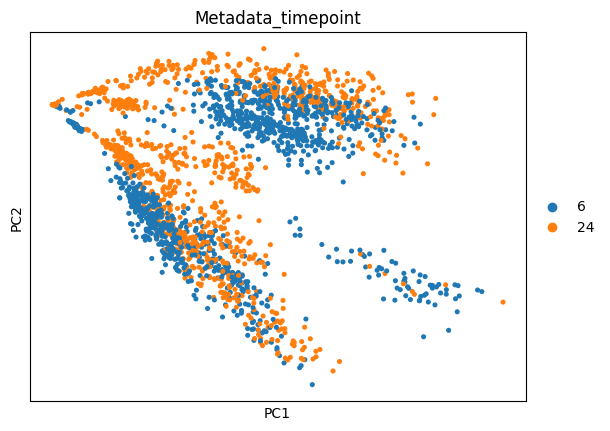

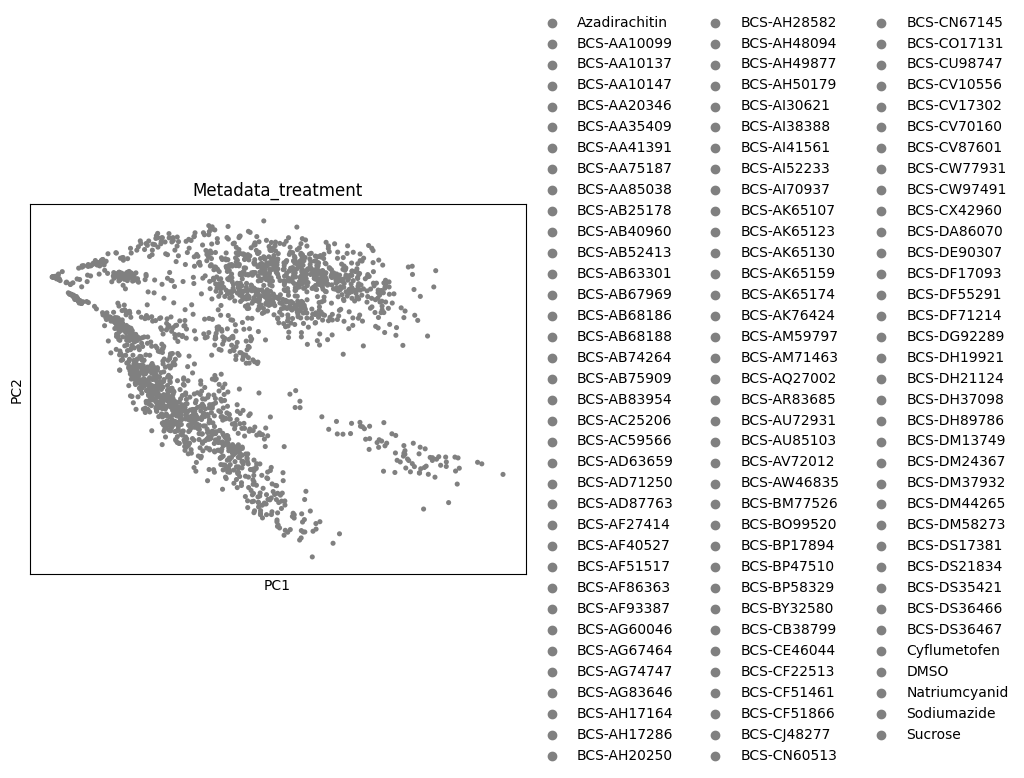

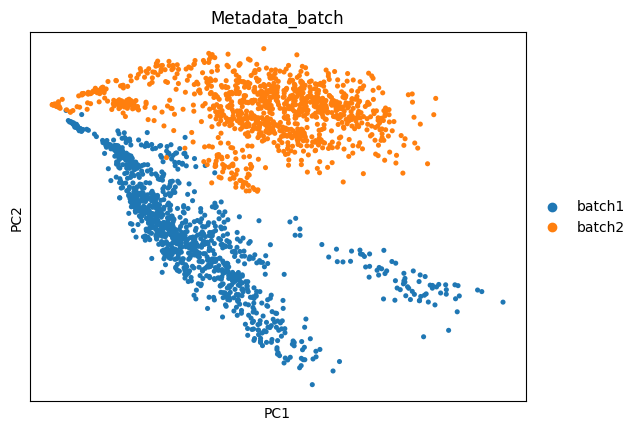

In [55]:
import scanpy as sc
import anndata
from scanpy.external import pp as external_pp

adata = anndata.AnnData(X=df[gene_columns].reset_index(drop=True), obs=df[metadata_columns].reset_index(drop=True))

# Create AnnData object
sc.tl.pca(adata)
sc.pl.pca(adata, color="Metadata_Mode_of_Action")
plt.show()
sc.pl.pca(adata, color="Metadata_plate")
plt.show()
sc.pl.pca(adata, color="Metadata_timepoint")
plt.show()
sc.pl.pca(adata, color="Metadata_treatment")
plt.show()
sc.pl.pca(adata, color="Metadata_batch")
plt.show()
#sc.pl.highest_expr_genes(adata, n_top=20)

In [56]:
adata.obs["Metadata_plate"].unique()

['batch1_plate1_24h', 'batch1_plate2_6h', 'batch1_plate3_6h', 'batch1_plate4_6h', 'batch1_plate5_24h', ..., 'batch2_plate2_6h', 'batch2_plate3_24h', 'batch2_plate4_24h', 'batch2_plate5_24h', 'batch2_plate6_6h']
Length: 28
Categories (28, object): ['batch1_plate1_6h', 'batch1_plate1_24h', 'batch1_plate2_6h', 'batch1_plate2_24h', ..., 'batch2_plate5_6h', 'batch2_plate5_24h', 'batch2_plate6_6h', 'batch2_plate6_24h']

/home/ubuntu/miniconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ubuntu/miniconda3/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:174: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_counts"] = number


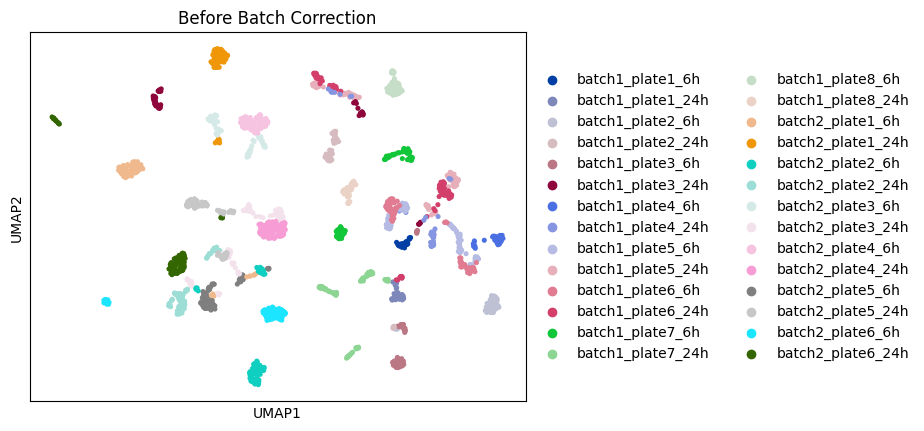

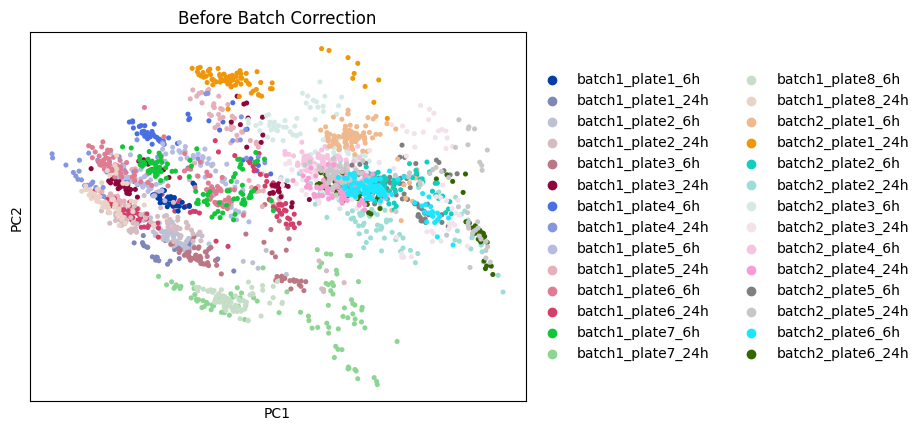

[[-0.10882379 -0.3315662  -0.09241156 ... -0.01586674 -0.00043457
  -0.00258582]
 [-0.12185821 -0.2608849  -0.12710333 ...  0.02529195 -0.00047409
   0.02177965]
 [-0.11154774 -0.17008545 -0.15663022 ... -0.07674358 -0.00074868
  -0.00573382]
 ...
 [-0.0225363  -0.29047683 -0.06697948 ... -0.03900919 -0.00056749
  -0.00763583]
 [ 0.01270891 -0.39800552 -0.09656506 ... -0.09892584 -0.00064306
  -0.00741776]
 [-0.01854192 -0.32762748 -0.08108409 ... -0.07720618 -0.0005832
  -0.01394118]]
[[-1.43966835e-02 -3.22180491e-01  7.61874291e-02 ... -3.53530052e-02
  -3.68861101e-04 -5.97299296e-03]
 [-5.50018200e-02 -1.66248493e-01 -2.05952546e-02 ...  1.91213264e-02
  -4.33734534e-04  2.05700814e-02]
 [-2.28823899e-02  3.40667429e-02 -1.02969008e-01 ... -1.15924700e-01
  -8.84454541e-04 -9.40233454e-03]
 ...
 [-7.39316210e-02 -2.34580883e-01 -1.19983150e-01 ...  3.30423105e-02
  -9.99272553e-04 -8.81044691e-03]
 [-4.69049614e-02 -3.78217507e-01 -1.68354952e-01 ... -7.18925032e-02
  -1.44496499e

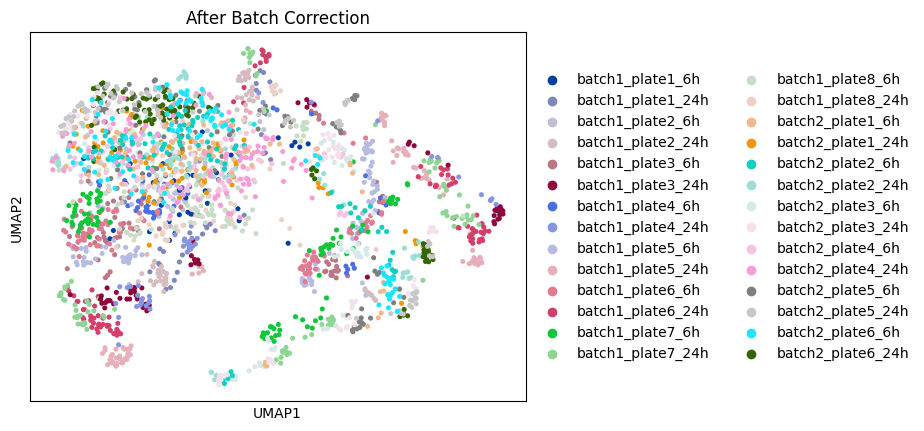

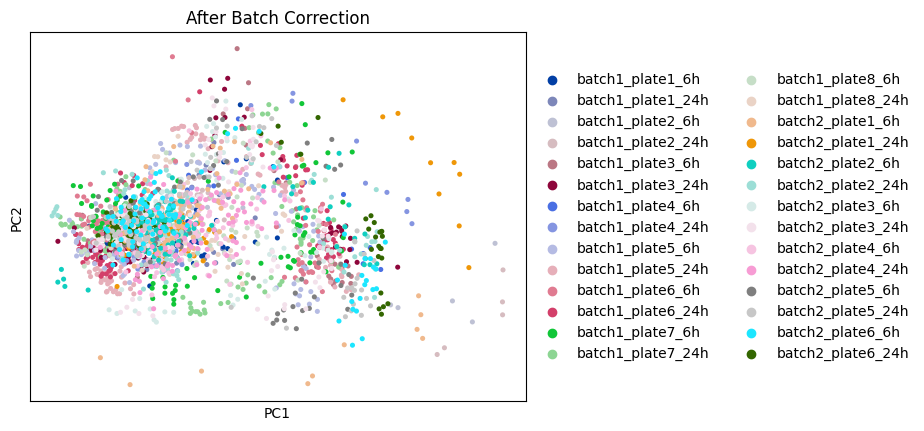

In [57]:
from sklearn.impute import SimpleImputer

adata = anndata.AnnData(X=df[gene_columns].reset_index(drop=True).fillna(0), obs=df[metadata_columns].reset_index(drop=True))

adata = adata[adata.obs["Metadata_Mode_of_Action"].isin(adata.obs["Metadata_Mode_of_Action"].value_counts()[adata.obs["Metadata_Mode_of_Action"].value_counts() >= 10].index)]
adata.obs["Metadata_Mode_of_Action"].value_counts()
if scanpy_normalisation:
    # Step 1: Filter cells and genes with adjusted thresholds
    sc.pp.filter_cells(adata, min_counts=df.shape[1] * cut_samples_fraction)  # Adjust as needed
    sc.pp.filter_genes(adata, min_counts=df.shape[0] * cut_genes_fraction)  # Adjust as needed

    # Step 2: Calculate quality control metrics
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=True, inplace=True)

    # Step 3: Normalize total counts
    sc.pp.normalize_total(adata, target_sum=10000, exclude_highly_expressed=True)

    # Step 4: Log-transform the data
    sc.pp.log1p(adata)
    
    # Step 5: Regress out the effects of total counts
    sc.pp.regress_out(adata, ["total_counts"])

    # Alternative: Use MNN correction instead
    if exclude_higly_expressed:
        # # Step 7: Identify highly variable genes
        sc.pp.highly_variable_genes(
            adata,
            #n_top_genes=250
        )

        # # Step 8: Subset the data to include only highly variable genes
        adata = adata[:, adata.var.highly_variable]

    imputer = SimpleImputer(strategy='mean')  # or use 'median', 'most_frequent', etc.
    adata.X = imputer.fit_transform(adata.X)    # Step 9: Visualize before and after batch correction
    # Before correction visualization
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='Metadata_plate', title='Before Batch Correction')
    sc.pl.pca(adata, color='Metadata_plate', title='Before Batch Correction')
    print(adata.X)
    imputer = SimpleImputer(strategy='mean')  # or use 'median', 'most_frequent', etc.

    adata.X = imputer.fit_transform(adata.X)

    # Step 6: Batch correction using ComBat with covariates
    sc.pp.combat(
        adata,
        key='Metadata_plate',
        #covariates = ["Metadata_treatment", "Metadata_concentration"]
    )
    
    print(adata.X)
    # After correction visualization
    sc.tl.pca(adata)  # Recompute PCA after correction
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='Metadata_plate', title='After Batch Correction')
    sc.pl.pca(adata, color='Metadata_plate', title='After Batch Correction')

else:

    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='Metadata_plate', title='Before Batch Correction')
    sc.pl.pca(adata, color='Metadata_plate', title='Before Batch Correction')

    sc.pp.combat(
        adata,
        key='Metadata_plate',
        #covariates = ["Metadata_treatment"]
    )
    #external_pp.mnn_correct(adata, batch_key='Metadata_plate')
    imputer = SimpleImputer(strategy='mean')  # or use 'median', 'most_frequent', etc.
    adata.X = imputer.fit_transform(adata.X)
    # After correction visualization
    sc.tl.pca(adata)  # Recompute PCA after correction
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='Metadata_plate', title='After Batch Correction')
    sc.pl.pca(adata, color='Metadata_plate', title='After Batch Correction')

    #external_pp.mnn_correct(adata, batch_key='Metadata_plate', n_jobs=16)



## Scale the data to unit variance
#sc.pp.scale(adata)

# Perform Principal Component Analysis (PCA)
sc.tl.pca(adata, svd_solver='arpack')

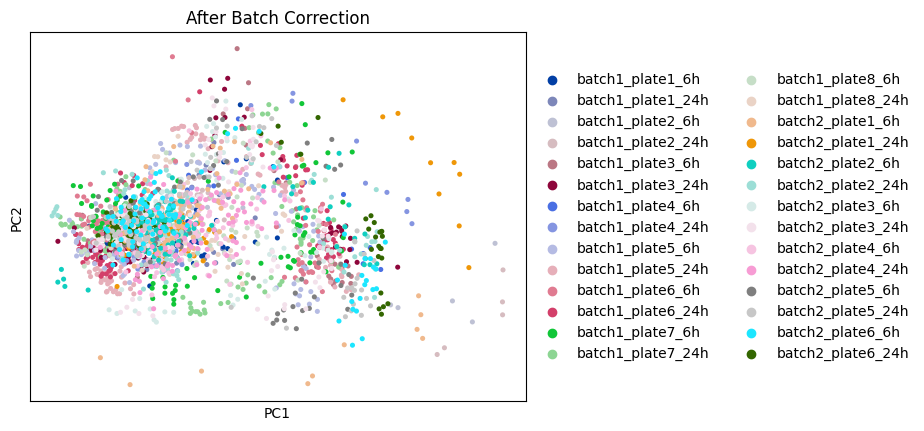

In [58]:
sc.pl.pca(adata, color='Metadata_plate', title='After Batch Correction')


In [59]:
adata.obs["Metadata_concentration"] = adata.obs["Metadata_concentration"].fillna(0).astype(str)

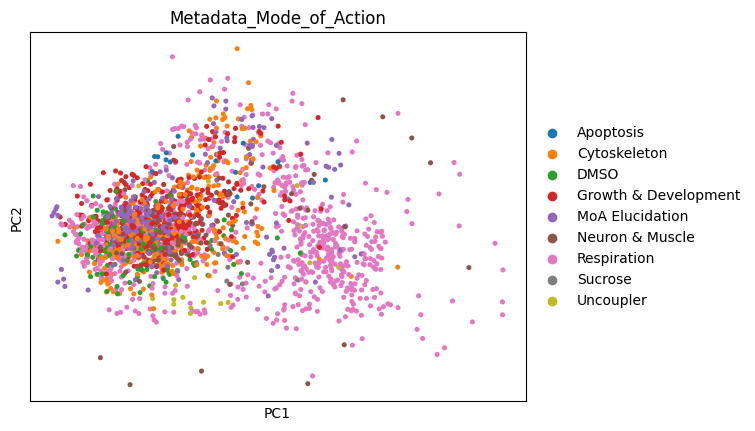

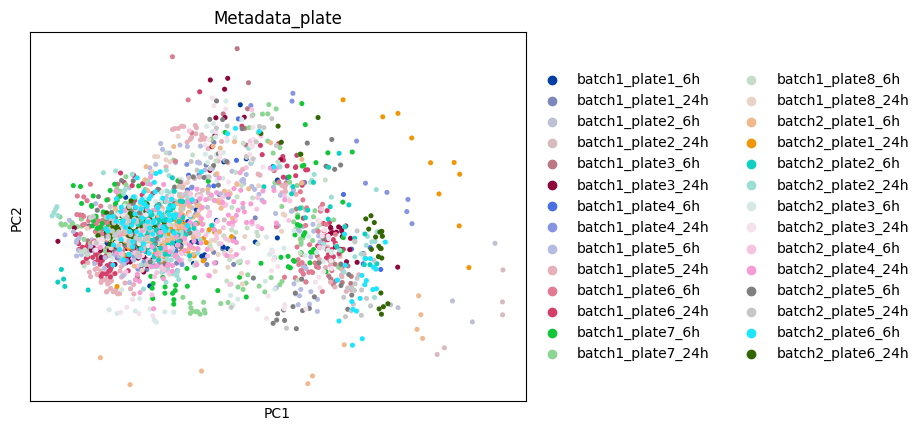

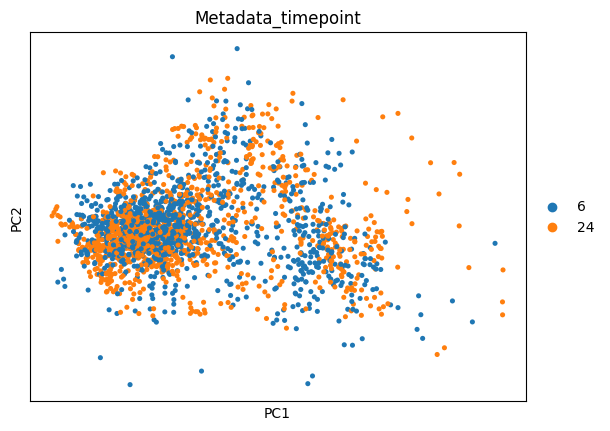

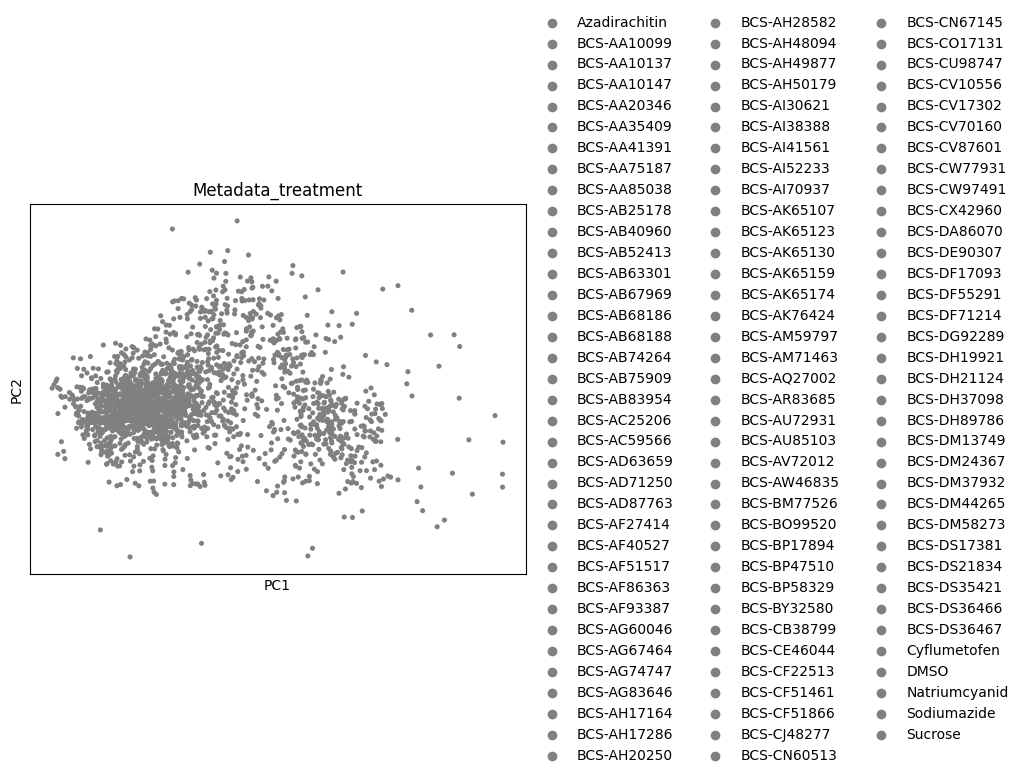

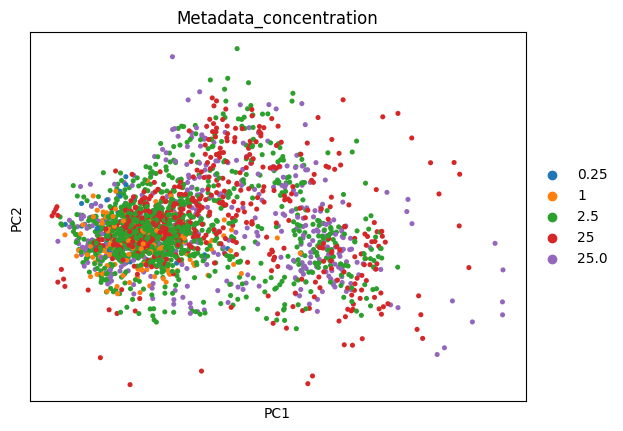

In [60]:
import matplotlib.pyplot as plt
# Additional plots for validation

sc.pl.pca(adata, color="Metadata_Mode_of_Action")
plt.show()
sc.pl.pca(adata, color="Metadata_plate")
plt.show()
sc.pl.pca(adata, color="Metadata_timepoint")
plt.show()
sc.pl.pca(adata, color="Metadata_treatment")
plt.show()
sc.pl.pca(adata, color="Metadata_concentration")
plt.show()
# sc.pl.pca(adata, color="leiden")
# plt.show()


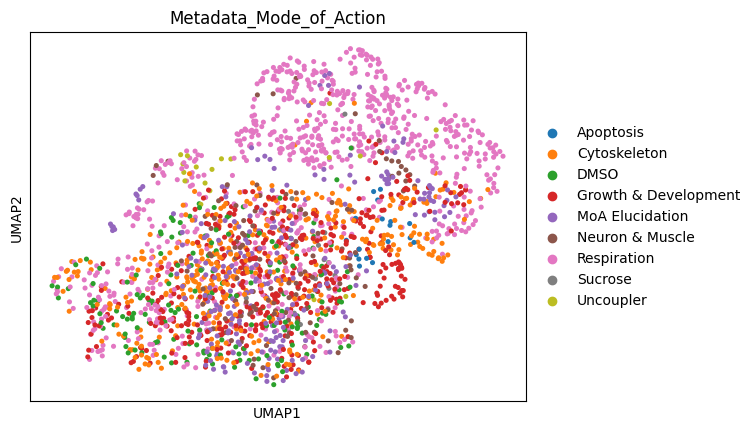

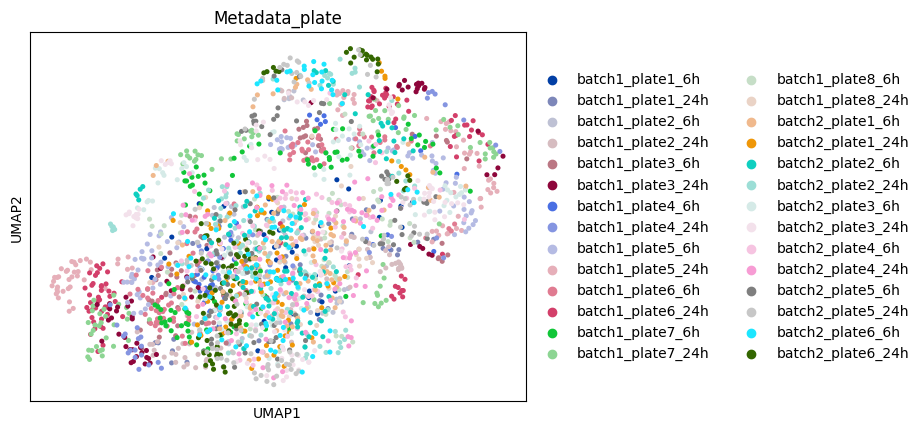

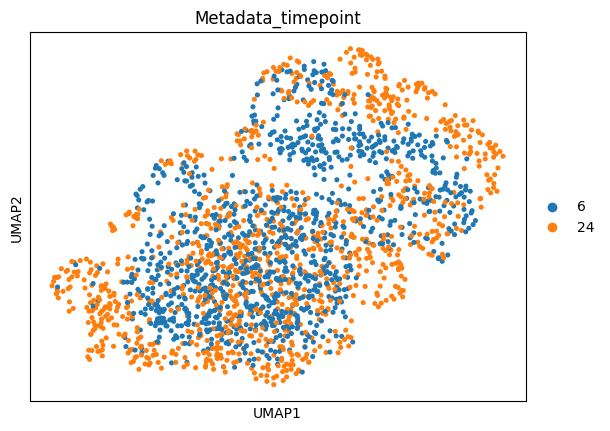

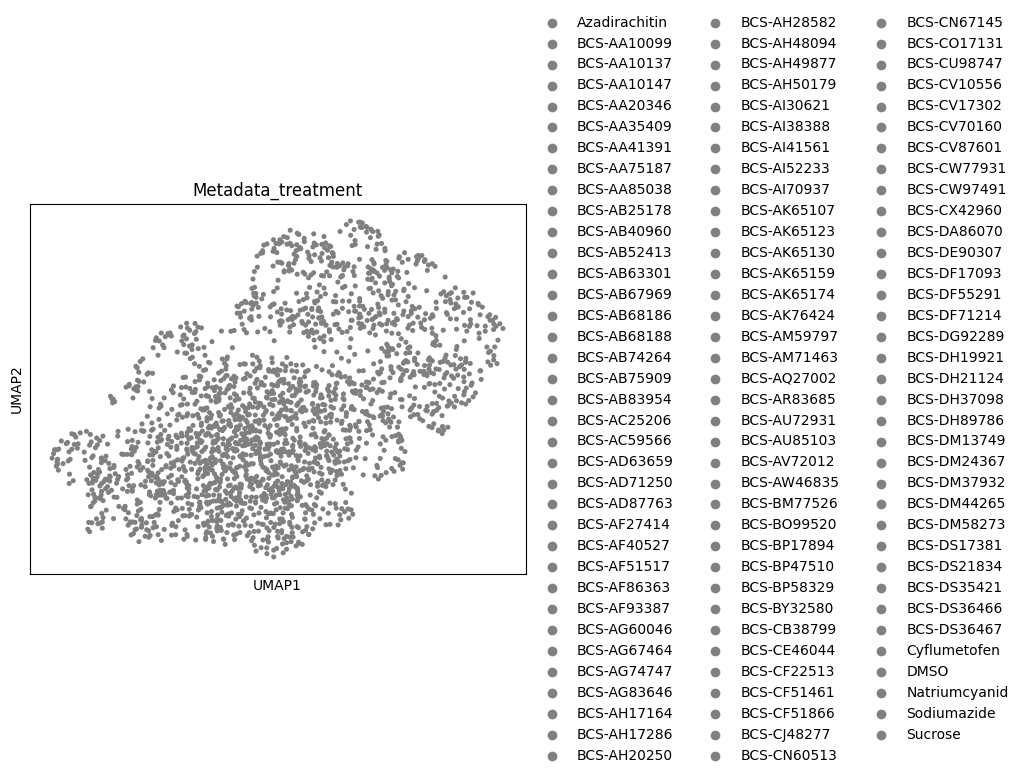

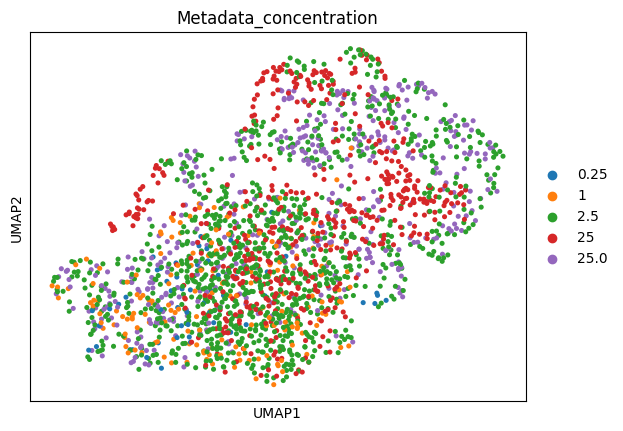

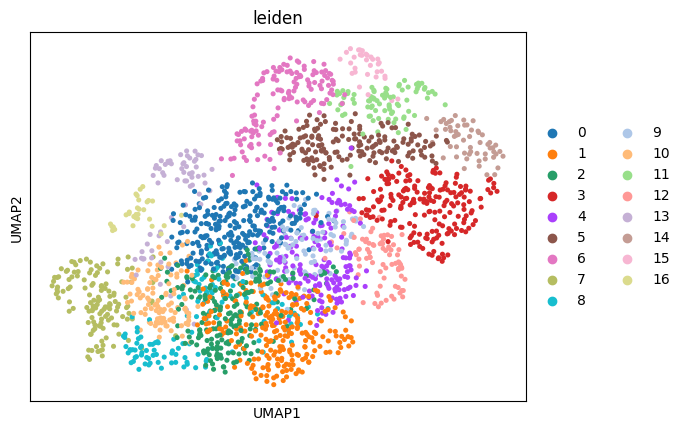

In [61]:
# Compute the neighborhood graph
sc.pp.neighbors(adata,
    n_neighbors = 15,
    n_pcs = 10
)

# Run Leiden clustering
sc.tl.leiden(
    adata,
    resolution=0.99
)

# Run PAGA
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, plot=False)

# Perform UMAP
sc.tl.umap(
    adata,
    min_dist=0.9, 
    init_pos='paga'
)

# Check the separation of clusters in UMAP
sc.pl.umap(adata, color='Metadata_Mode_of_Action')
plt.show()
sc.pl.umap(adata, color='Metadata_plate')
plt.show()
sc.pl.umap(adata, color='Metadata_timepoint')
plt.show()
sc.pl.umap(adata, color='Metadata_treatment')
plt.show()
sc.pl.umap(adata, color='Metadata_concentration')
plt.show()
sc.pl.umap(adata, color='leiden')
plt.show()

In [62]:
adata.write('monheim_transcriptomics_scanpy_normalised.h5')  # Save as HDF5 file

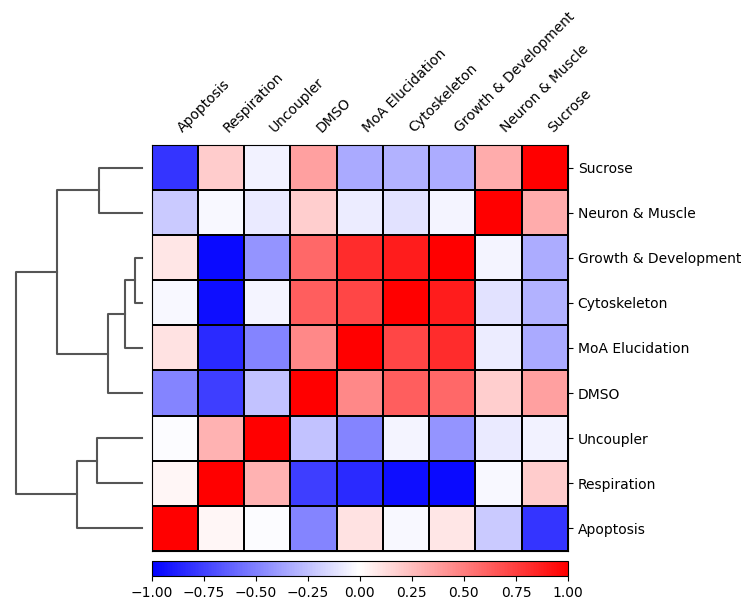

In [63]:
#ax = sc.pl.correlation_matrix(adata, "Metadata_treatment", show=True)  # Prevents the plot from displaying
ax = sc.pl.correlation_matrix(adata, "Metadata_Mode_of_Action", show=True)  # Prevents the plot from displaying
#ax = sc.pl.correlation_matrix(adata, "leiden", show=True)  # Prevents the plot from displaying

In [64]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, leaves_list

# First, get the unique groups from Metadata_treat_moa
groups = adata.obs['Metadata_treat_moa'].unique()

# Create a dictionary to store the mean expression for each group
group_means = {}

# Calculate mean expression for each group
for group in groups:
    mask = adata.obs['Metadata_treat_moa'] == group
    if mask.sum() > 0:  # Check if there are any cells in this group
        group_means[group] = np.mean(adata.X[mask], axis=0)

# Convert to DataFrame
means_df = pd.DataFrame(group_means)

# Calculate correlation matrix between groups
correlation_matrix = means_df.corr()

# Perform hierarchical clustering
Z = linkage(correlation_matrix, method='average', metric='euclidean')

# Get the order of rows/columns based on hierarchical clustering
idx = leaves_list(Z)

# Reorder the correlation matrix
ordered_corr_matrix = correlation_matrix.iloc[idx, idx]

# Save the ordered correlation matrix to CSV
ordered_corr_matrix.to_csv('ordered_correlation_matrix_metadata_treat_moa.csv')


In [65]:
ordered_corr_matrix

BCS-AK76424  BCS-AK76424  Respiration 24  \
BCS-AK76424  BCS-AK76424  Respiration 24                                      1.000000   
BCS-DA86070  BCS-DA86070  Respiration 24                                      0.914518   
BCS-CW97491  BCS-CW97491  Respiration 24                                      0.826398   
BCS-AD63659  BCS-AD63659  Respiration 6                                       0.673735   
BCS-AW46835  BCS-AW46835  Respiration 6                                       0.613596   
...                                                                                ...   
Sucrose  Sucrose  Sucrose 24                                                 -0.180841   
Sucrose  Sucrose  Sucrose 6                                                  -0.106606   
in vivo hit  BCS-DS35421  MoA Elucidation 24                                 -0.039690   
BCS-CW77931  BCS-CW77931  Cytoskeleton 24                                    -0.053500   
BCS-CW77931  BCS-CW77931  Cytoskeleton 6                                      0.066195   

                                              BCS-DA86070  BCS-DA86070  Respiration 24  \
BCS-AK76424  BCS-AK76424  Respiration 24                                      0.914518   
BCS-DA86070  BCS-DA86070  Respiration 24                                      1.000000   
BCS-CW97491  BCS-CW97491  Respiration 24                                      0.884025   
BCS-AD63659  BCS-AD63659  Respiration 6                                       0.722313   
BCS-AW46835  BCS-AW46835  Respiration 6                                       0.692869   
...                                                                                ...   
Sucrose  Sucrose  Sucrose 24                                                 -0.086315   
Sucrose  Sucrose  Sucrose 6                                                  -0.040426   
in vivo hit  BCS-DS35421  MoA Elucidation 24                                  0.025730   
BCS-CW77931  BCS-CW77931  Cytoskeleton 24                                    -0.019361   
BCS-CW77931  BCS-CW77931  Cytoskeleton 6                                      0.083220   

                                              BCS-CW97491  BCS-CW97491  Respiration 24  \
BCS-AK76424  BCS-AK76424  Respiration 24                                      0.826398   
BCS-DA86070  BCS-DA86070  Respiration 24                                      0.884025   
BCS-CW97491  BCS-CW97491  Respiration 24                                      1.000000   
BCS-AD63659  BCS-AD63659  Respiration 6                                       0.703949   
BCS-AW46835  BCS-AW46835  Respiration 6                                       0.650765   
...                                                                                ...   
Sucrose  Sucrose  Sucrose 24                                                 -0.104445   
Sucrose  Sucrose  Sucrose 6                                                  -0.101436   
in vivo hit  BCS-DS35421  MoA Elucidation 24                                 -0.018504   
BCS-CW77931  BCS-CW77931  Cytoskeleton 24                                    -0.075343   
BCS-CW77931  BCS-CW77931  Cytoskeleton 6                                      0.047880   

                                              BCS-AD63659  BCS-AD63659  Respiration 6  \
BCS-AK76424  BCS-AK76424  Respiration 24                                     0.673735   
BCS-DA86070  BCS-DA86070  Respiration 24                                     0.722313   
BCS-CW97491  BCS-CW97491  Respiration 24                                     0.703949   
BCS-AD63659  BCS-AD63659  Respiration 6                                      1.000000   
BCS-AW46835  BCS-AW46835  Respiration 6                                      0.817690   
...                                                                               ...   
Sucrose  Sucrose  Sucrose 24                                                -0.098404   
Sucrose  Sucrose  Sucrose 6                                                 -0.248390   
in

<Axes: >

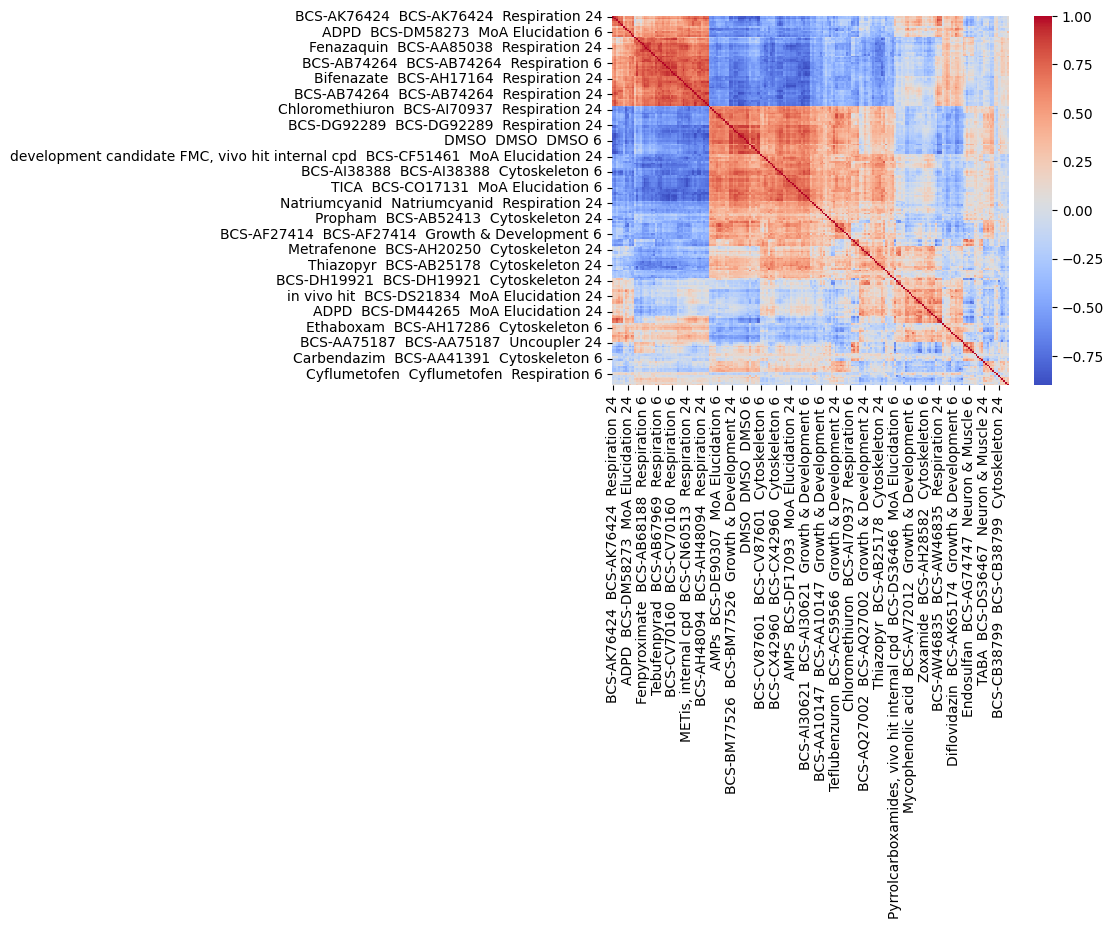

In [66]:
sns.heatmap(ordered_corr_matrix, cmap='coolwarm', annot=False)

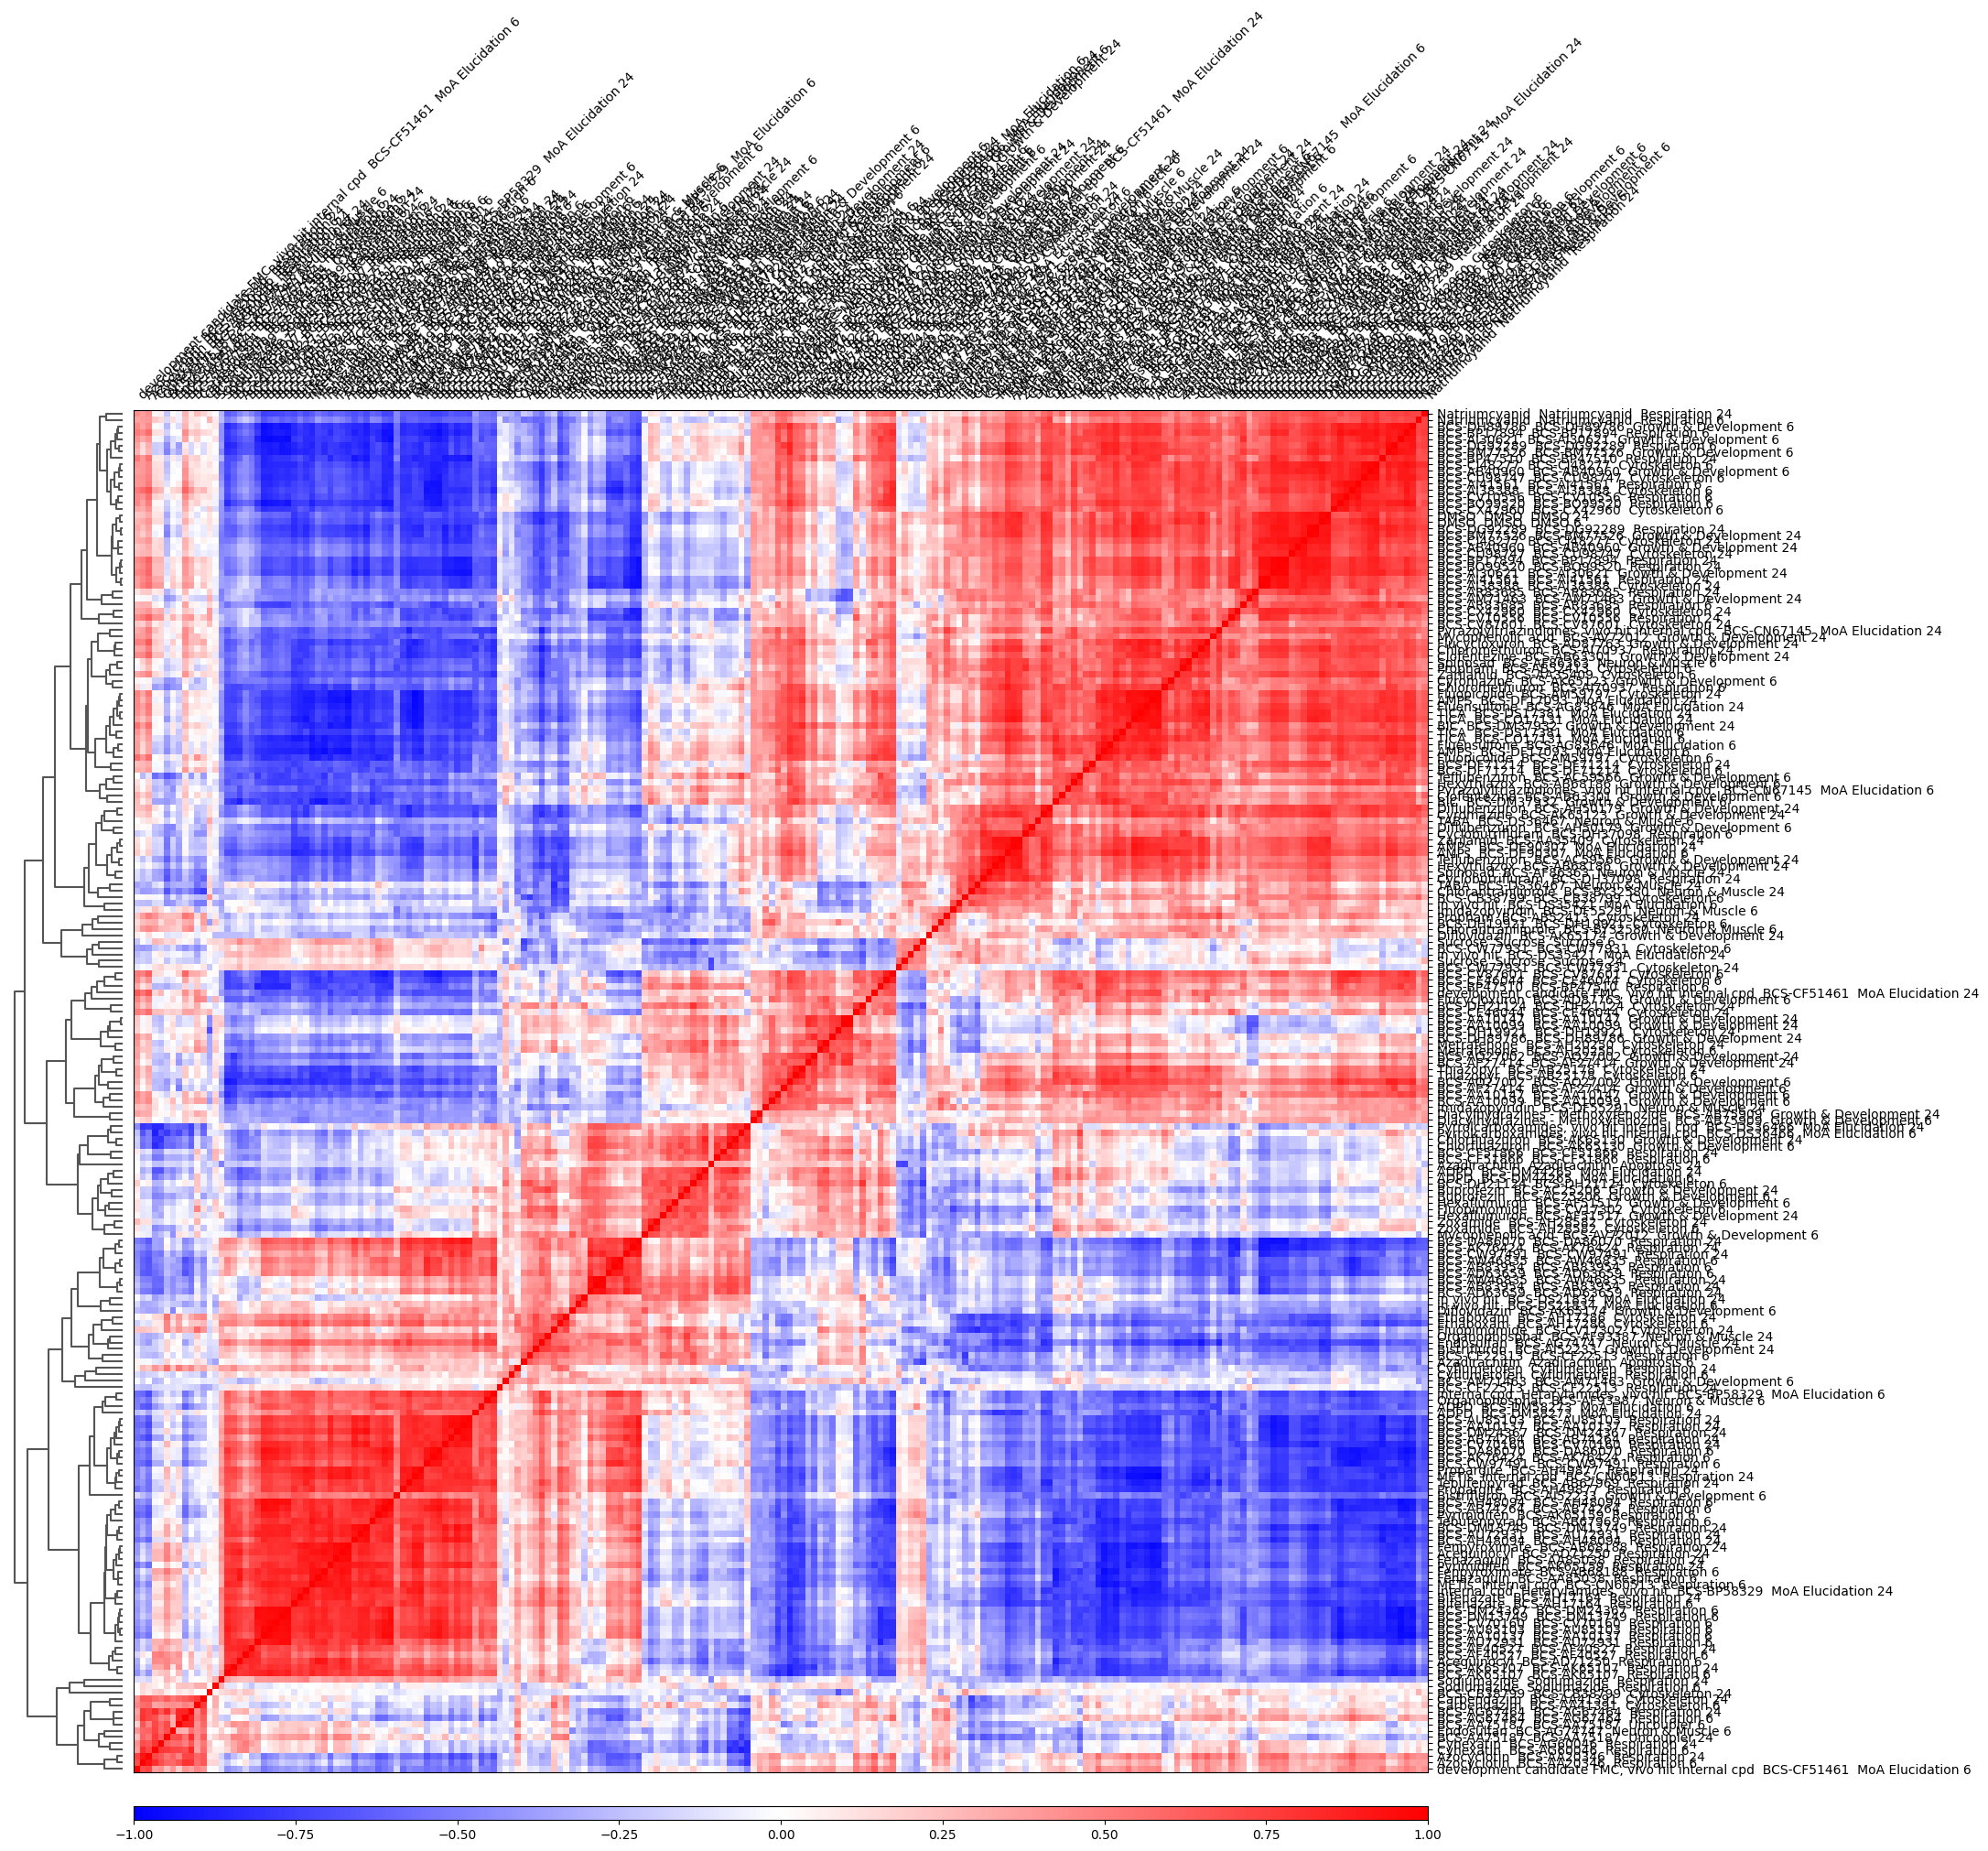

In [67]:
sc.tl.dendrogram(adata, groupby="Metadata_treat_moa")
ax = sc.pl.correlation_matrix(adata, "Metadata_treat_moa", show=True, figsize = (20,20))  # Prevents the plot from displaying

In [68]:
data

NameError: name 'data' is not defined

In [ ]:
# Assuming 'adata' is your AnnData object and 'Metadata_treat_moa' is the column of interest
# Create a DataFrame from the relevant observation data
data = adata.X

# Compute the correlation matrix
correlation_matrix = data.corr()

# Convert the correlation matrix to a DataFrame
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df.index 

# Optionally, you can save it to a CSV file
correlation_df.to_csv('correlation_matrix_metadata_treat_moa.csv')

# Display the DataFrame if needed
print(correlation_df)

ValueError: could not convert string to float: 'DMSO  DMSO'

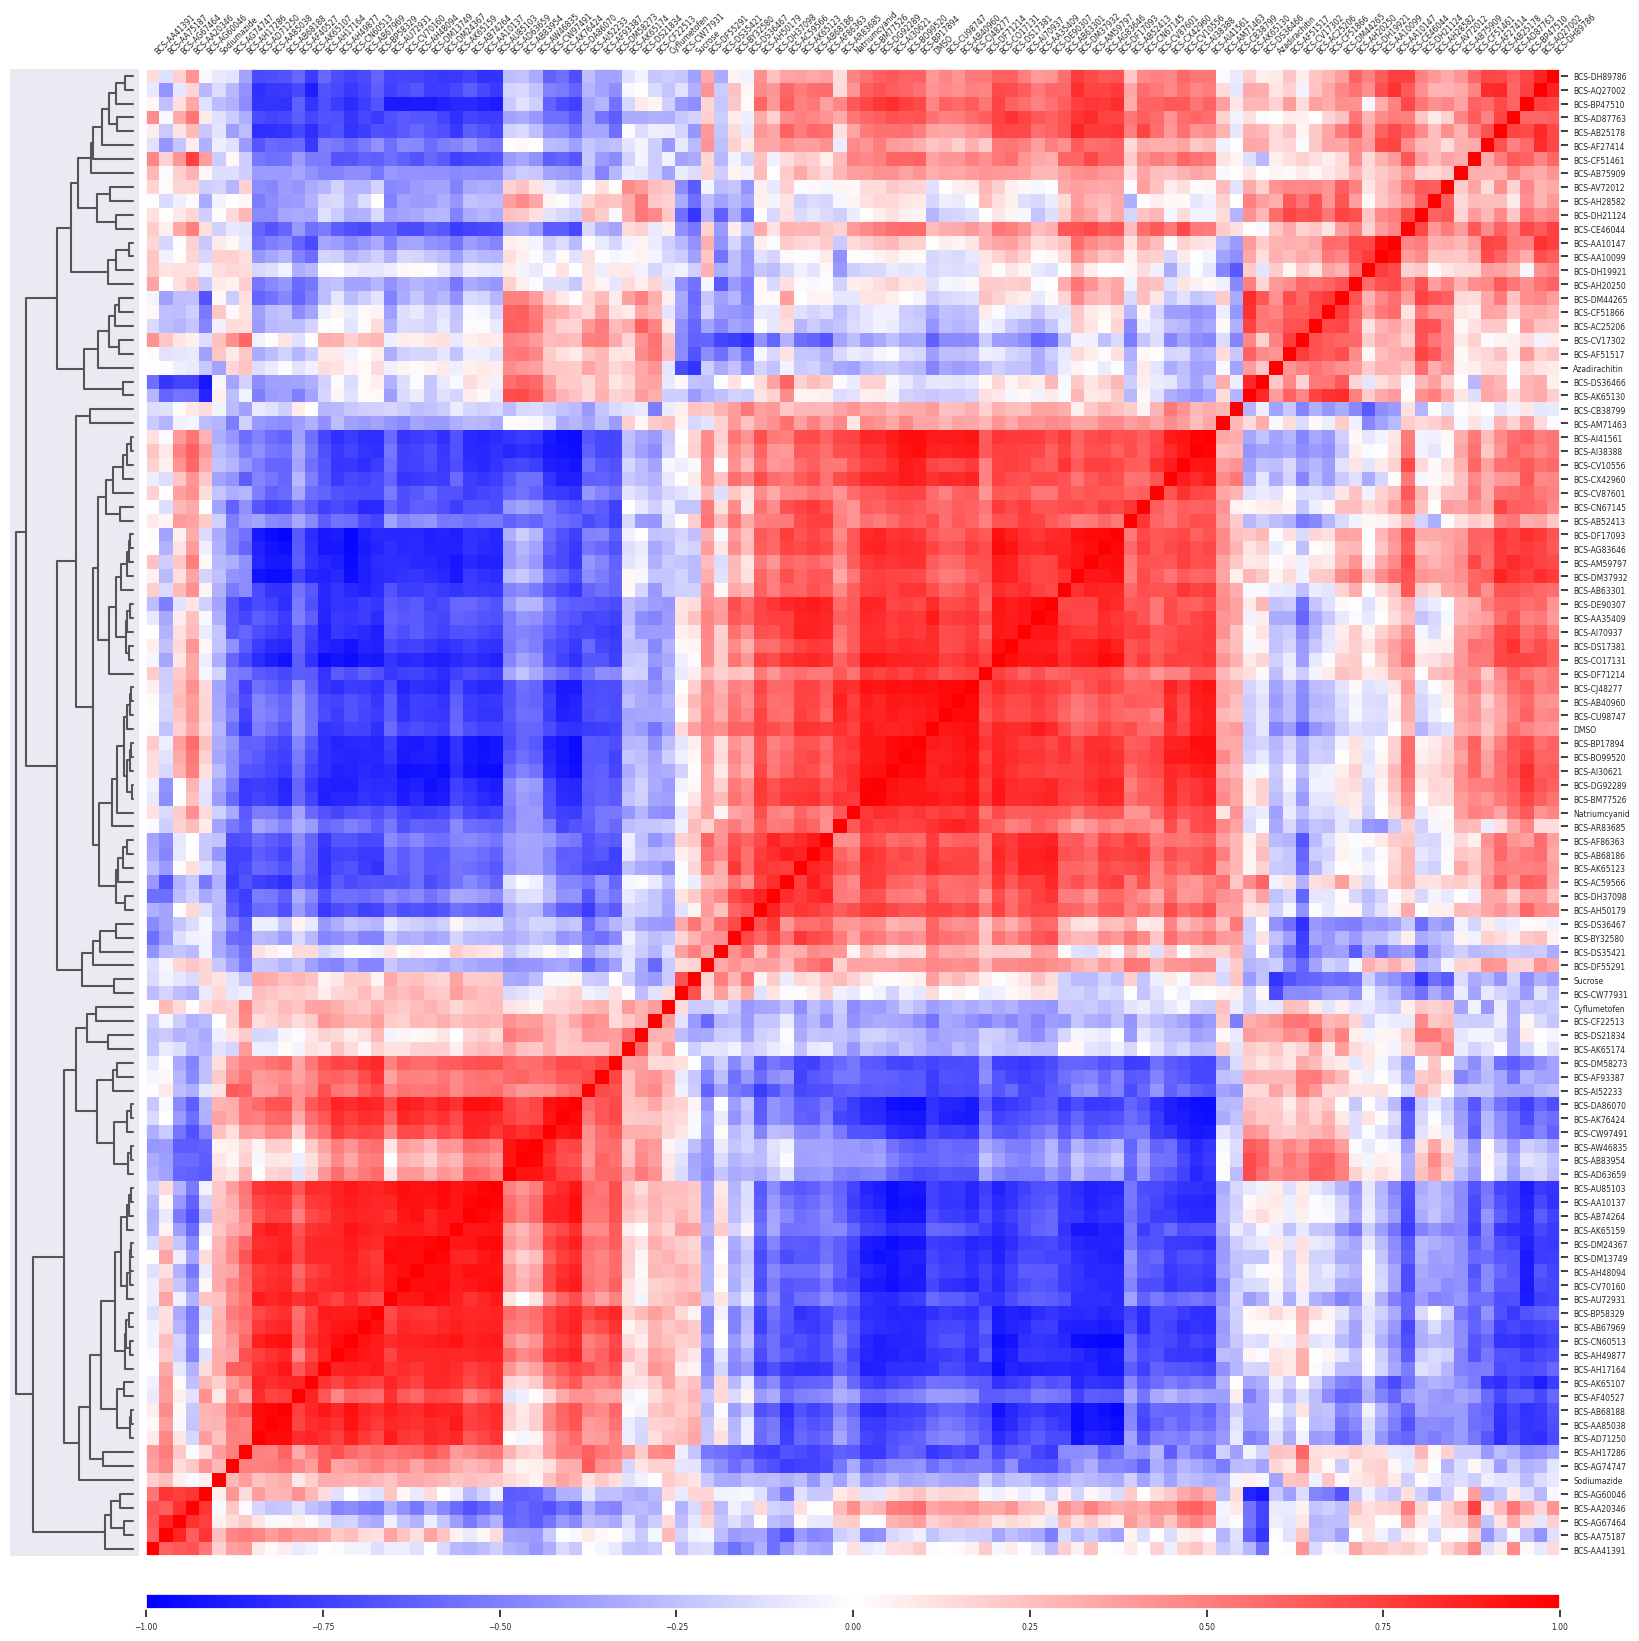

In [ ]:
sc.tl.dendrogram(adata, groupby="Metadata_treatment")
ax = sc.pl.correlation_matrix(adata, "Metadata_treatment", show=True, figsize = (20,20))  # Prevents the plot from displaying

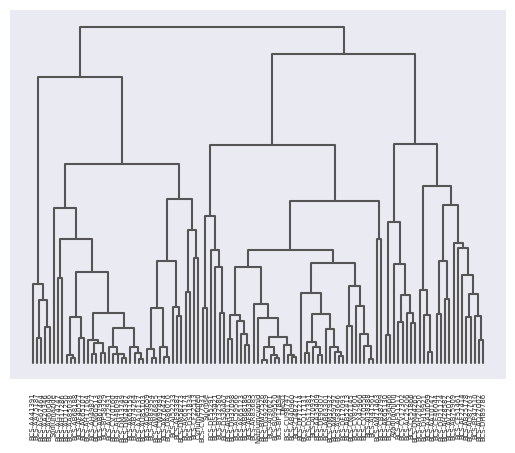

<Axes: >

In [ ]:
sc.tl.dendrogram(adata, groupby="Metadata_treatment")
sc.pl.dendrogram(adata, groupby="Metadata_treatment")

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list


# Create a DataFrame for the heatmap
heatmap_data = adata.obs[[
    "Metadata_Mode_of_Action",
    #"Metadata_timepoint",
    "Metadata_plate",
    "Metadata_concentration",
    #"leiden",
    "Metadata_treatment"
]]

# Check if the linkage matrix is valid
# if "dendrogram_Metadata_treatment" not in adata.uns or not isinstance(adata.uns["dendrogram_Metadata_treatment"], np.ndarray):
# Compute the correlation matrix
correlation_matrix = np.corrcoef(adata.X)

# Perform hierarchical clustering
linkage_matrix = linkage(correlation_matrix, method='ward')

# Store the linkage matrix in adata.uns
adata.uns["dendrogram_Metadata_treatment"] = linkage_matrix

heatmap_data.set_index("Metadata_treatment", inplace=True)

# Factorize the metadata for the heatmap
factorized_data = heatmap_data.apply(lambda x: pd.factorize(x)[0])


# else:
#     linkage_matrix = adata.uns["dendrogram_Metadata_treatment"].astype(float)


In [ ]:
sns.set(font_scale=0.5)

# Create the heatmap
g = sns.clustermap(
    factorized_data,
    col_cluster=False,
    row_linkage=linkage_matrix,
    cmap='tab20',
    annot=heatmap_data,
    cbar=False,
    linewidths=0.001,
    fmt="",
    figsize=(8, 100),
    dendrogram_ratio=0.02,
    xticklabels = True,
    yticklabels = True
)
g.ax_col_dendrogram.set_visible(False)
g.ax_cbar.set_visible(False)
g.ax_heatmap.tick_params(axis='x', which='both', labelsize=5)
#g.ax_heatmap.tick_params(axis='both', which='minor', labelsize=5)
#plt.tight_layout()

plt.close()

In [ ]:
list(adata.obs[adata.obs["Metadata_Mode_of_Action"] == "Respiration"]["Metadata_treatment"].unique())

['BCS-CF22513',
 'BCS-AK65107',
 'BCS-AR83685',
 'BCS-CV70160',
 'BCS-AK76424',
 'BCS-DA86070',
 'BCS-CV10556',
 'BCS-CF51866',
 'BCS-AW46835',
 'BCS-AU85103',
 'BCS-AI41561',
 'BCS-AB83954',
 'BCS-AU72931',
 'BCS-CW97491',
 'BCS-DM24367',
 'BCS-DM13749',
 'BCS-BP17894',
 'BCS-BO99520',
 'BCS-AA10137',
 'BCS-BP47510',
 'BCS-DG92289',
 'BCS-AD63659',
 'BCS-AB74264',
 'BCS-AH48094',
 'BCS-AG67464',
 'BCS-AF40527',
 'Cyflumetofen',
 'Sodiumazide',
 'Natriumcyanid',
 'BCS-AB67969',
 'BCS-AI70937',
 'BCS-AH17164',
 'BCS-AH49877',
 'BCS-DH37098',
 'BCS-AK65159',
 'BCS-AG60046',
 'BCS-AA20346',
 'BCS-AA85038',
 'BCS-AD71250',
 'BCS-AB68188',
 'BCS-CN60513']

In [ ]:
adata

AnnData object with n_obs × n_vars = 2234 × 12135
    obs: 'Metadata_Wells', 'Metadata_timepoint', 'Metadata_treatment', 'Metadata_concentration', 'Metadata_plate', 'Metadata_BCS', 'Metadata_MOA', 'Metadata_total_counts', 'Metadata_batch', 'Metadata_treatment_sheet', 'Metadata_Mode_of_Action', 'Metadata_Clearname', 'Metadata_log_concentration', 'Metadata_treat_moa', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden'
    var: 'n_counts', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'Metadata_plate_colors', 'Metadata_Mode_of_Action_colors', 'Metadata_timepoint_colors', 'Metadata_treatment_colors', 'Metadata_concentration_colors', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'dendrogram_Metadata_Mode_of_Action', 'dendrogram_Metadata_treat_moa', 'dendrogram_Metadata_treatment'
    obsm: 'X_pca', 'X_umap'
    va

In [ ]:
# sc.tl.rank_genes_groups(
#     adata,
#     "Metadata_Mode_of_Action",
#     reference ="DMSO",
#     #method="logreg",
# )
# sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

# # for moa in adata.obs["Metadata_Mode_of_Action"].unique():
# #     if moa == "DMSO":
# #         continue
# #     sc.pl.rank_genes_groups_violin(adata, groups=moa, n_genes=8)
    
# dedf = sc.get.rank_genes_groups_df(adata, group="Respiration")
# dedf = dedf.fillna(1)
# dedf.sort_values("pvals_adj", inplace=True)
# print(dedf)

# print(dedf[dedf["names"].isin(genes)])

In [ ]:
df_backup = df_norm.copy()

NameError: name 'df_norm' is not defined

In [ ]:
df = df_backup.copy()
df["Metadata_timepoint"].unique()
print(df.shape)
df.rename(columns = {
    "Metadata_MOA" : "Metadata_Mode_of_Action",
    "Metadata_treatment": "Metadata_treatment",
}, inplace = True)
df.loc[df["Metadata_treatment"] == "DMSO", "Metadata_concentration"] = 1

df["Metadata_log_concentration"] = np.log10(df["Metadata_concentration"].astype(float).fillna(0))

In [ ]:
treatments_of_interest = [
    "BCS-AI39439",
    "BCS-AM71463",
    "BCS-BP17894",
    "DMSO"
]
timepoints_of_interest = [
    6,
    24
]
df = df[df["Metadata_treatment"].isin(treatments_of_interest)]
df = df[df["Metadata_timepoint"].isin(timepoints_of_interest)]

# Example: counts should be a DataFrame with genes as rows and samples as columns
counts = df[gene_columns].fillna(0).astype(int)
counts = counts.loc[:, counts.var() != 0]
metadata = df[metadata_columns]
print(counts.shape)
print(metadata.shape)
metadata.index = counts.index

metadata["Metadata_concentration"] = metadata["Metadata_concentration"].astype(float)
metadata["Metadata_timepoint"] = metadata["Metadata_timepoint"].astype(int)
metadata["Metadata_plate"] = metadata["Metadata_plate"].astype(str)

metadata.groupby(["Metadata_treatment"]).value_counts()
non_dmsos = metadata[metadata["Metadata_treatment"] != "DMSO"]
dmsos = metadata[metadata["Metadata_treatment"] == "DMSO"]
metadata.loc[metadata["Metadata_treatment"] == "DMSO", "Metadata_concentration"] = np.random.choice(non_dmsos["Metadata_concentration"].unique(), dmsos.shape[0])
metadata.groupby(["Metadata_treatment"])[["Metadata_treatment","Metadata_timepoint","Metadata_concentration", "Metadata_plate"]].value_counts()


In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference

inference = DefaultInference(n_cpus=8)
# Create DESeqDataSet
dds = DeseqDataSet(
    counts = counts.reset_index(drop=True),
    metadata = metadata.reset_index(drop=True),
    design = "~ Metadata_treatment + Metadata_timepoint + Metadata_concentration",
    refit_cooks=True,
    inference = inference
)
dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()
dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

In [ ]:
treatment = "BCS-AM71463"

In [ ]:
from pydeseq2.ds import DeseqStats
ds = DeseqStats(
    dds,
    contrast=["Metadata_treatment", treatment, "DMSO"],
    alpha=0.05,
    cooks_filter=True,
    independent_filter=True,
)
ds.run_wald_test()
if ds.independent_filter:
    ds._independent_filtering()
else:
    ds._p_value_adjustment()
    
ds.summary()

# Sort by adjusted p-values
summary_df = ds.results_df.copy()
summary_df.sort_values("padj", inplace=True)
genes = [
    "LOC118264662",
    "LOC118276274"
]
print(summary_df[summary_df.index.isin(genes)])
print(summary_df)


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

def make_volcano(data_frame, treatment):
    """
    Make an interactive volcano plot as an html. Attach meta data to individual genes.

    Parameters
    ----------
    treatment : string
        Name of the treatment

    Returns
    -------
    fig : object
        The figure object of the volcano plot

    pd.Series : object
        Pandas series containing the log2foldchange. Will be used later for
        colouring in the plot_gene_atlas function
    """

    # Convert p-values into -Log10p
    data_frame["-Log10P"] = np.log10(data_frame["padj"]) * -1
    data_frame.loc[data_frame["-Log10P"] < 0, "-Log10P"] = 0
    
    # Filter for significant Up-regulated and Down-regulated genes
    data_frame["Type hit"] = "Under Threshold"
    data_frame.loc[(data_frame["log2FoldChange"] > 1) & (data_frame["padj"] < 0.05), "Type hit"] = "Up-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1"
    data_frame.loc[(data_frame["log2FoldChange"] < -1) & (data_frame["padj"] < 0.05), "Type hit"] = "Down-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1"

    # Filter out non-significant genes
    data_frame.sort_values("-Log10P", ascending=False, inplace=True)

    data_frame.rename(columns={
        "log2FoldChange": "Log(2) Fold-Change",
        "-Log10P": "-Log(10) of adjusted P-value"
    }, inplace=True)
    
    all_significant = data_frame[data_frame["Type hit"] != "Under Threshold"].sort_values("-Log(10) of adjusted P-value", ascending=False)
    filtered_data = all_significant.iloc[:10]
    
    fig = plt.figure(figsize=(18, 12))

    colour_dict = {
        "Under Threshold": "lightgrey",
        "Up-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1": "cornflowerblue",
        "Down-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1": "crimson"
    }

    # Make figure
    g = sns.scatterplot(
        data=data_frame,
        x="Log(2) Fold-Change",
        y="-Log(10) of adjusted P-value",
        hue="Type hit",
        alpha=0.6,
        palette=colour_dict,
        legend=True,
        edgecolor='none'
    )

    # Add lines to show thresholds
    ax = plt.gca()
    ax.axhline(y=np.log10(0.05) * -1, lw=2, ls="--", c="grey")
    ax.axvline(x=1, lw=2, ls="--", c="grey")
    ax.axvline(x=-1, lw=2, ls="--", c="grey")
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=12)

    texts = []
    for gene, row in filtered_data.iterrows():
        # Check the log2 fold change to determine text position
        if row["Log(2) Fold-Change"] < 1:
            x_offset = 0.05  # Offset to the right
        else:
            x_offset = -0.05  # Offset to the left for better visibility

        texts.append(
            ax.text(
                row["Log(2) Fold-Change"] + x_offset,
                row["-Log(10) of adjusted P-value"] * 1.01,
                f"{gene}",
                fontsize=14,
                color='black'
            )
        )

    # Use adjustText to avoid overlapping labels
    adjust_text(
        texts,
        #expand=(1.1, 1.1),
        #only_move='y',  # Move only in the y direction
        arrowprops=dict(color='silver', lw=1)
    )

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    fig.suptitle(f"Volcano plot of treatment {treatment}", fontsize=16)
    #plt.savefig(f"figures/volcano_plot_alithea_{treatment}.png",  bbox_inches='tight', dpi=300)
    #plt.savefig(f"figures/volcano_plot_alithea_{treatment}.svg")
    plt.show()
    #plt.close()   
    #return(all_significant) 

In [ ]:
make_volcano(summary_df, treatment)

In [ ]:
summary_df[summary_df["Type hit"] != "Under Threshold"].sort_values("padj").head(10)

In [ ]:
sc.tl.rank_genes_groups(
    adata_small,
    "Metadata_treatment",
    reference ="DMSO",
    #method="wilcoxon",
)

sc.pl.rank_genes_groups(adata_small, n_genes=20, sharey=False)
dedf = sc.get.rank_genes_groups_df(adata_small, group="BCS-BP17894")
dedf = dedf.fillna(1)
dedf.sort_values("pvals_adj", inplace=True)
print(dedf)

print(dedf[dedf["names"].isin(genes)])
#sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)
# for treatment in ["BCS-AI39439", "BCS-AM71463", "BCS-BP17894"]:
#sc.pl.rank_genes_groups_violin(adata, groups="BCS-BP17894", n_genes=10)

# for moa in adata.obs["Metadata_Mode_of_Action"].unique():
#     if moa == "DMSO":
#         continue
#     sc.pl.rank_genes_groups_violin(adata, groups=moa, n_genes=8)

In [ ]:
# sc.tl.rank_genes_groups(
#     adata,
#     "Metadata_treatment",
#     reference ="DMSO",
#     method="wilcoxon",
# )
# genes = [
#     "LOC118264662",
#     "LOC118276274"
# ]
# sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False)

# for moa in adata.obs["Metadata_treatment"].unique():
#     if moa == "DMSO":
#         continue
#     sc.pl.rank_genes_groups_violin(adata, groups=moa, gene_names = genes)

In [ ]:
adata.X.shape

In [ ]:
# Create a dot plot for the top genes
sc.pl.rank_genes_groups_dotplot(
    adata,
    #"Metadata_Mode_of_Action",
    n_genes = 5,
    #values_to_plot = ["scores", "logfoldchanges", "pvals"],
    standard_scale='var'
)


In [ ]:
adata.obs["Metadata_Mode_of_Action"].unique()

In [ ]:
# Run rank_genes_groups if not already done
sc.tl.rank_genes_groups(
    adata,
    groupby="Metadata_Mode_of_Action",
    #method = "wilcoxon",
    #reference="DMSO"  # Ensure this group exists
)

print(adata.uns['rank_genes_groups']['logfoldchanges'])


In [ ]:


# Check unique values in the groupby column
print(adata.obs['Metadata_Mode_of_Action'].unique())

# Create a dot plot for the ranked genes
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="Metadata_Mode_of_Action",
    n_genes=5,  # Adjust to the number of genes you want to plot
    cmap = "bwr",
    values_to_plot="logfoldchanges",
)

In [ ]:
breakpoint()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.lines import Line2D


adata.obs["UMAP 1"] = adata.obsm["X_umap"][:,0]
adata.obs["UMAP 2"] = adata.obsm["X_umap"][:,1]

# Define unique markers for "Metadata_FRAC_sub_group"
markers = [ f"${i}$" for i in range(adata.obs["Leiden Cluster"].nunique()) ]
marker_map = dict(zip(adata.obs["Leiden Cluster"].unique(), markers))

# Plot using matplotlib

category_color_map

fig = plt.figure(figsize = (12,10))

ax = plt.gca()
sns.scatterplot(
    data = adata.obs,
    x = "UMAP 1",
    y = "UMAP 2",
    #size = "Log Concentration",
    s = 100,
    lw = 0,
    hue = "FRAC Sub-group",
    palette = category_color_map,
    style = "Leiden Cluster",
    markers = marker_map,
    alpha = 1,
    ax = ax
)

min_x = adata.obs["UMAP 1"].min()
min_y = adata.obs["UMAP 2"].min()
max_x = adata.obs["UMAP 1"].max()
max_y = adata.obs["UMAP 2"].max()

# Calculate cluster centers and radii for "Mode of Action"
# Calculate cluster centers and radii for "Mode of Action"
for mode, group in adata.obs.groupby("Mode of Action"):
    # Cluster center
    center_x, center_y = group["UMAP 1"].mean(), group["UMAP 2"].mean()
    # Calculate radius as the maximum distance from the center
    radius = np.sqrt(((group["UMAP 1"] - center_x) ** 2 + (group["UMAP 2"] - center_y) ** 2).max())
        # Update min/max values to include circle boundaries
    min_x = min(min_x, center_x - radius * 1.1)
    max_x = max(max_x, center_x + radius * 1.1)
    min_y = min(min_y, center_y - radius * 1.1)
    max_y = max(max_y, center_y + radius * 1.1)
    # Add circle
    circle = Circle(
        (center_x, center_y), 
        radius=radius * 1.1, 
        color=category_color_map[mode], 
        fill=True, 
        #linewidth=1.5, 
        linewidth=0, 
        alpha=0.1, 
        #linestyle="--"
    )
    ax.add_patch(circle)
    
    # Annotate with Mode of Action above the circle
    ax.text(
        center_x, 
        center_y + radius * 1.15,  # Offset to position above the circle
        mode, 
        fontsize=12, 
        ha="center", 
        va="center", 
        color=category_color_map[mode], 
        #bbox=dict(facecolor="white", edgecolor="none", alpha=0.8)
    )
# plt.title("UMAP Plot with Automatic Circles Around Mode of Action Clusters")
# plt.show()
#ax.set_axis_off()

# Set axis limits
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=5, title="Legend", frameon=False,
)
ax.spines[['right', 'top']].set_visible(False)

# Create custom legend handles for "FRAC Sub-group" with circular markers
legend_handles = [
    Line2D(
        [0], [0],
        marker='o',  # Circular marker
        color=category_color_map[group],
        label=group,
        markerfacecolor=category_color_map[group],
        markersize=10,
        linestyle='None'
    )
    for group in sorted(adata.obs["FRAC Sub-group"].unique())
]
legend_handles.append(
    Line2D(
        [0], [0],
        marker='$1$',  # Circular marker
        color="silver",
        label="Leiden Cluster",
        #markerfacecolor=category_color_map[group],
        markersize=10,
        linestyle='None'
    )
)

# Add the legend with custom handles
# Add the legend with custom handles
ax.legend(
    handles=legend_handles,
    title="FRAC Sub-group",
    bbox_to_anchor=(0.5, -0.1),  # Position below the plot
    loc="upper center",          # Center the legend below the plot
    ncol=2,                      # Arrange legend items in a single row
    frameon=False                # Remove legend frame
)
plt.savefig("cluster_plot.png", bbox_inches='tight')
plt.savefig("cluster_plot.svg")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.close()

In [ ]:
df = df[df["Metadata_Name_Chemical_group"] != ""]
adata = adata[adata.obs["Metadata_Name_Chemical_group"] != ""]

In [ ]:
ax = sc.pl.correlation_matrix(adata, "Leiden Cluster", show = False, save="_leiden.svg")
plt.close()

In [ ]:
ax = sc.pl.correlation_matrix(adata, "FRAC Sub-group", show = False, save="_frac.svg")
plt.close()

In [ ]:
ax = sc.pl.correlation_matrix(adata, "Metadata_Name_Chemical_group", show = True, save="_treatment.svg")
plt.close()

In [ ]:
#adata.obs.head()

In [ ]:
#ax = sc.pl.correlation_matrix(adata, "Metadata_Name_Chemical_group")

In [ ]:
#print(adata.obs["Treatment"].value_counts())

In [ ]:
# Count the number of samples for each treatment
treatment_counts = adata.obs['Treatment'].value_counts()

# Filter out treatments with only one sample
valid_treatments = treatment_counts[treatment_counts > 1].index

# Filter the adata object to keep only the valid treatments
adata = adata[adata.obs['Treatment'].isin(valid_treatments)].copy()


In [ ]:
# groupings = [
#     "Mode of Action",
#     "Treatment",
#     "FRAC Sub-group"
# ]

# for treatment in groupings:
#     sig_df = volcano_plot(
#         adata.copy(),
#         #df[df["Metadata_treatment"].isin([treatment, "DMSO"])].copy(),
#         treatment,
#         pval_threshold=0.05,
#         lfc_threshold=1
#     )

In [ ]:
#volcano_plot_comparison(adata, "FRAC Sub-group" )

In [ ]:
treatments_of_interest

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

def make_volcano(treatment):
    """
    Make an interactive volcano plot as an html. Attach meta data to individual genes.

    Parameters
    ----------
    treatment : string
        Name of the treatment

    Returns
    -------
    fig : object
        The figure object of the volcano plot

    pd.Series : object
        Pandas series containing the log2foldchange. Will be used later for
        colouring in the plot_gene_atlas function
    """
    table = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_alithea/DeSeq/Tables/{treatment} at 24_differential_expression.tsv"
    if not os.path.isfile(table):
        table = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_alithea/DeSeq/Tables/{treatment}_differential_expression.tsv"
    
    # Read in data
    data_frame = pd.read_table(table, index_col=0)

    # Convert p-values into -Log10p
    data_frame["-Log10P"] = np.log10(data_frame["padj"]) * -1
    data_frame.loc[data_frame["-Log10P"] < 0, "-Log10P"] = 0
    
    # Filter for significant Up-regulated and Down-regulated genes
    data_frame["Type hit"] = "Under Threshold"
    data_frame.loc[(data_frame["log2FoldChange"] > 1) & (data_frame["padj"] < 0.05), "Type hit"] = "Up-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1"
    data_frame.loc[(data_frame["log2FoldChange"] < -1) & (data_frame["padj"] < 0.05), "Type hit"] = "Down-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1"

    # Filter out non-significant genes
    data_frame.sort_values("-Log10P", ascending=False, inplace=True)

    data_frame.rename(columns={
        "log2FoldChange": "Log(2) Fold-Change",
        "-Log10P": "-Log(10) of adjusted P-value"
    }, inplace=True)
    
    all_significant = data_frame[data_frame["Type hit"] != "Under Threshold"].sort_values("-Log(10) of adjusted P-value", ascending=False)
    filtered_data = all_significant.iloc[:10]
    
    fig = plt.figure(figsize=(18, 12))

    colour_dict = {
        "Under Threshold": "lightgrey",
        "Up-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1": "cornflowerblue",
        "Down-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1": "crimson"
    }

    # Make figure
    g = sns.scatterplot(
        data=data_frame,
        x="Log(2) Fold-Change",
        y="-Log(10) of adjusted P-value",
        hue="Type hit",
        alpha=0.6,
        palette=colour_dict,
        legend=True,
        edgecolor='none'
    )

    # Add lines to show thresholds
    ax = plt.gca()
    ax.axhline(y=np.log10(0.05) * -1, lw=2, ls="--", c="grey")
    ax.axvline(x=1, lw=2, ls="--", c="grey")
    ax.axvline(x=-1, lw=2, ls="--", c="grey")
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=12)

    texts = []
    for gene, row in filtered_data.iterrows():
        # Check the log2 fold change to determine text position
        if row["Log(2) Fold-Change"] < 1:
            x_offset = 0.05  # Offset to the right
        else:
            x_offset = -0.05  # Offset to the left for better visibility

        texts.append(
            ax.text(
                row["Log(2) Fold-Change"] + x_offset,
                row["-Log(10) of adjusted P-value"] * 1.01,
                f"{gene}",
                fontsize=14,
                color='black'
            )
        )

    # Use adjustText to avoid overlapping labels
    adjust_text(
        texts,
        #expand=(1.1, 1.1),
        #only_move='y',  # Move only in the y direction
        arrowprops=dict(color='silver', lw=1)
    )

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    treatment = bcs2clearname[treatment]

    fig.suptitle(f"Volcano plot of treatment {treatment}", fontsize=16)
    plt.savefig(f"figures/volcano_plot_alithea_{treatment}.png",  bbox_inches='tight', dpi=300)
    plt.savefig(f"figures/volcano_plot_alithea_{treatment}.svg")
    #plt.show()
    plt.close()   
    return(all_significant) 

# Note: You may need to adjust the parameters of `adjust_text` based on your specific needs.

In [ ]:
def make_volcano_bulk(treatment):
    """
    Make an interactive volcano plot as an html. Attach meta data to individual genes.

    Parameters
    ----------
    treatment : string
        Name of the treatment

    Returns
    -------
    fig : object
        The figure object of the volcano plot

    pd.Series : object
        Pandas series containing the log2foldchange. Will be used later for
        colouring in the plot_gene_atlas function
    """
    table = f"/home/ec2-user/sophia_comparisons3_mount/Experiments/20240731_Lyon_comparison_bulk/DeSeq/Tables/{treatment} at 24_differential_expression.tsv"
    if not os.path.isfile(table):
        table = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_bulk/DeSeq/Tables/{treatment}_differential_expression.tsv"
    
    # Read in data
    data_frame = pd.read_table(table, index_col=0)

    # Convert p-values into -Log10p
    data_frame["-Log10P"] = np.log10(data_frame["padj"]) * -1
    data_frame.loc[data_frame["-Log10P"] < 0, "-Log10P"] = 0
    
    # Filter for significant Up-regulated and Down-regulated genes
    data_frame["Type hit"] = "Under Threshold"
    data_frame.loc[(data_frame["log2FoldChange"] > 1) & (data_frame["padj"] < 0.05), "Type hit"] = "Up-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1"
    data_frame.loc[(data_frame["log2FoldChange"] < -1) & (data_frame["padj"] < 0.05), "Type hit"] = "Down-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1"

    # Filter out non-significant genes
    data_frame.sort_values("-Log10P", ascending=False, inplace=True)

    data_frame.rename(columns={
        "log2FoldChange": "Log(2) Fold-Change",
        "-Log10P": "-Log(10) of adjusted P-value"
    }, inplace=True)
    
    all_significant = data_frame[data_frame["Type hit"] != "Under Threshold"].sort_values("-Log(10) of adjusted P-value", ascending=False)
    filtered_data = all_significant.iloc[:10]

    fig = plt.figure(figsize=(18, 12))

    colour_dict = {
        "Under Threshold": "lightgrey",
        "Up-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1": "cornflowerblue",
        "Down-regulated over threshold of P < 0.05 \n and log(2) Fold-Change > 1": "crimson"
    }

    # Make figure
    g = sns.scatterplot(
        data=data_frame,
        x="Log(2) Fold-Change",
        y="-Log(10) of adjusted P-value",
        hue="Type hit",
        alpha=0.6,
        palette=colour_dict,
        legend=True,
        edgecolor='none'
    )

    # Add lines to show thresholds
    ax = plt.gca()
    ax.axhline(y=np.log10(0.05) * -1, lw=2, ls="--", c="grey")
    ax.axvline(x=1, lw=2, ls="--", c="grey")
    ax.axvline(x=-1, lw=2, ls="--", c="grey")
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=12)

    texts = []
    for gene, row in filtered_data.iterrows():
        # Check the log2 fold change to determine text position
        if row["Log(2) Fold-Change"] < 1:
            x_offset = 0.05  # Offset to the right
        else:
            x_offset = -0.05  # Offset to the left for better visibility

        texts.append(
            ax.text(
                row["Log(2) Fold-Change"] + x_offset,
                row["-Log(10) of adjusted P-value"] * 1.01,
                f"{gene}",
                fontsize=14,
                color='black'
            )
        )

    # Use adjustText to avoid overlapping labels
    adjust_text(
        texts,
        #expand=(1.1, 1.1),
        #only_move='y',  # Move only in the y direction
        arrowprops=dict(color='silver', lw=1)
    )

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    treatment = bcs2clearname[treatment]
    fig.suptitle(f"Volcano plot of treatment {treatment}", fontsize=16)
    plt.savefig(f"figures/volcano_plot_bulk_{treatment}.png",  bbox_inches='tight', dpi=300)
    plt.savefig(f"figures/volcano_plot_bulk_{treatment}.svg")
    #plt.show()
    plt.close()    
    return(all_significant)

# Note: You may need to adjust the parameters of `adjust_text` based on your specific needs.

In [ ]:
significance_bulk = {}
significance_alithea = {}
for treatment in treatments_of_interest:
    significance_alithea[treatment] = make_volcano(treatment)
    significance_bulk[treatment] = make_volcano_bulk(treatment)
    
# list(map(make_volcano, treatments_of_interest))
# list(map(make_volcano_bulk, treatments_of_interest))

In [ ]:
# Load the GTF file
gtf_path = "/home/ec2-user/sophia_comparison/s3_mount/RefGenomes/BotrytisCinerea/Botrytis_cinerea.ASM83294v1.59.gtf"

gtf_data = pd.read_csv(gtf_path, sep='\t', comment='#', header=None)
#gtf_data = gtf_data[gtf_data[2] == 'gene']
# Extract gene lengths
gtf_data.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
gtf_data['gene_id'] = gtf_data['attribute'].str.extract('gene_id "([^"]+)"')

# Calculate gene lengths
gtf_data['gene_length'] = gtf_data['end'] - gtf_data['start']
lengths_dict = dict(zip(gtf_data['gene_id'], gtf_data['gene_length']))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles
import pandas as pd
import numpy as np

def overlap_significance_technology(treatment, significance_bulk, significance_alithea, lengths_dict):
    genes_alithea = set(significance_alithea[treatment].index)
    genes_bulk = set(significance_bulk[treatment].index)
    
    # Identify unique and overlapping genes
    unique_alithea = genes_alithea - genes_bulk
    unique_bulk = genes_bulk - genes_alithea
    overlap_genes = genes_alithea & genes_bulk
    
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 1, figsize=(8, 12))  # 2 rows, 1 column

    # Venn diagram
    v = venn2(
        subsets=(len(unique_alithea), len(unique_bulk), len(overlap_genes)),
        set_labels=('Multiplexed RNAseq', 'Bulk RNAseq'),
        ax=axs[0]  # Use the first subplot
    )
    c = venn2_circles(
        subsets=(len(unique_alithea), len(unique_bulk), len(overlap_genes)),
        linestyle="-",
        linewidth=1,
        color="white",
        alpha=0.5,
        ax=axs[0]  # Use the first subplot
    )
    
    axs[0].set_title(f"Overlap of significant genes for treatment {treatment}", fontsize=16)

    # Prepare data for the strip plot
    lengths_alithea = [lengths_dict[gene] for gene in unique_alithea if gene in lengths_dict]
    lengths_bulk = [lengths_dict[gene] for gene in unique_bulk if gene in lengths_dict]
    lengths_overlap = [lengths_dict[gene] for gene in overlap_genes if gene in lengths_dict]

    # Create the DataFrame with the correct order for Gene Type
    violin_data = pd.DataFrame({
        "Gene Length":  lengths_alithea + lengths_overlap + lengths_bulk,
        "Gene Type": ["Unique Multiplexed RNAseq"] * len(lengths_alithea) + ["Overlap"] * len(lengths_overlap) +  ["Unique Bulk RNAseq"] * len(lengths_bulk) 
    })

    # Define colors for the strip plot
    strip_palette = {
        "Unique Multiplexed RNAseq": "#ff9999",
        "Unique Bulk RNAseq": "#99cc99",
        "Overlap": "#e0bc99"
    }
    
    # Calculate mean and standard error for each Gene Type
    mean_data = violin_data.groupby("Gene Type")["Gene Length"].agg(['mean', 'sem']).reset_index()
    mean_data.sort_values("Gene Type", inplace=True, key=lambda x: x.map({"Unique Multiplexed RNAseq": 1, "Overlap": 2, "Unique Bulk RNAseq": 3}))
    # Point plot for means with error bars
    sns.pointplot(
        data=mean_data,
        y="mean",
        x="Gene Type",
        estimator=np.mean,
        palette=strip_palette,  # Use the defined palette
        errorbar="se",
        markers='D',
        capsize=0.1,  # Add caps to error bars
        ax=axs[1],  # Use the second subplot
        zorder=1,
        markeredgecolor='white',  # Set edge color of markers to black
        #edgecolor='white'  # Set edge color of markers to white
    )
    
    # Strip plot
    sns.stripplot(
        data=violin_data,
        x="Gene Type",
        y="Gene Length",
        alpha=0.3,
        palette=strip_palette,  # Use the defined palette
        ax=axs[1],
        zorder=0
    )

    axs[1].set_title(f"Gene lengths of significant genes for treatment {treatment}", fontsize=16)

    # Save the figure
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f"figures/significant_overlap_{treatment}_combined_plots.png", bbox_inches='tight', dpi=300)
    plt.close()
    #plt.show()

In [ ]:
for treatment in treatments_of_interest:
    overlap_significance_technology(treatment, significance_bulk, significance_alithea, lengths_dict)

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def volcano_comparison(treatments):
    """
    Create an interactive volcano plot for multiple treatments and save as HTML. 
    Attach meta data to individual genes.

    Parameters
    ----------
    treatments : list of strings
        List of treatment names.

    Returns
    -------
    fig : object
        The figure object of the volcano plot.
    """
    fig, ax = plt.subplots(figsize=(18, 12))
    frac_group, treatments = treatments
    colour_dict = {
        "Under Threshold": "lightgrey",
        "Up-regulated": "cornflowerblue",
        "Down-regulated": "crimson"
    }

    markers = ['o', 'X', 'D', '^', 'v', 'p', '*']
    filtered_dataframes, overlapping_significant_genes = [], []

    for i, treatment in enumerate(treatments):
        table_path = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_alithea/DeSeq/Tables/{treatment} at 24_differential_expression.tsv"
        if not os.path.isfile(table_path):
            table_path = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_alithea/DeSeq/Tables/{treatment}_differential_expression.tsv"

        data_frame = pd.read_table(table_path, index_col=0)
        data_frame["-Log10P"] = np.maximum(-np.log10(data_frame["padj"]), 0)
        data_frame["Type hit"] = "Under Threshold"
        data_frame.loc[(data_frame["log2FoldChange"].abs() > 1) & (data_frame["padj"] < 0.05), "Type hit"] = "Up-regulated"
        data_frame.rename(columns={
            "log2FoldChange": "Log(2) Fold-Change",
            "-Log10P": "-Log(10) of adjusted P-value"
        }, inplace=True)
        
        significant_data = data_frame[data_frame["Type hit"] != "Under Threshold"].sort_values("-Log(10) of adjusted P-value", ascending=False)
        significant_data["Treatment"] = treatment
        filtered_dataframes.append(significant_data)
        overlapping_significant_genes.append(set(significant_data.index))

        sns.scatterplot(data=data_frame, x="Log(2) Fold-Change", y="-Log(10) of adjusted P-value", alpha=0.6, color="gainsboro", 
                        edgecolor='none', marker=markers[i % len(markers)], ax=ax)

    intersection_of_genes = set.intersection(*overlapping_significant_genes)
    n = min(len(intersection_of_genes), 10)
    colors = plt.get_cmap("tab10")(np.linspace(0, 1, n))
    
    overlapping_gene_data = pd.concat([df[df.index.isin(intersection_of_genes)] for df in filtered_dataframes], axis=0)

    if not overlapping_gene_data.empty:
        overlapping_gene_data["Top 10 overlapping\ngenes by significance"] = overlapping_gene_data.index
        top_genes = overlapping_gene_data.groupby("Top 10 overlapping\ngenes by significance")["-Log(10) of adjusted P-value"].max().nlargest(10).index
        overlapping_gene_data = overlapping_gene_data[overlapping_gene_data["Top 10 overlapping\ngenes by significance"].isin(top_genes)].sort_values("Top 10 overlapping\ngenes by significance")

        for i, gene in enumerate(sorted(overlapping_gene_data["Top 10 overlapping\ngenes by significance"].unique())):
            subset = overlapping_gene_data[overlapping_gene_data["Top 10 overlapping\ngenes by significance"] == gene]
            ax.plot(subset["Log(2) Fold-Change"], subset["-Log(10) of adjusted P-value"], ls="--", alpha=0.4, c = colors[i])
        sns.scatterplot(data=overlapping_gene_data, x="Log(2) Fold-Change", y="-Log(10) of adjusted P-value", hue="Top 10 overlapping\ngenes by significance", 
                        style="Treatment", markers=markers[:len(intersection_of_genes)], palette=colors, 
                        s=100, edgecolor="white", linewidth=1, ax=ax)

    # Add threshold lines
    ax.axhline(y=-np.log10(0.05), lw=2, ls="--", c="grey")
    ax.axvline(x=1, lw=2, ls="--", c="grey")
    ax.axvline(x=-1, lw=2, ls="--", c="grey")
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=12)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


    ax.set_title(f"Volcano Plot of FRAC-Group {frac_group}", fontsize=16)
    plt.savefig(f"figures/volcano_plot_{frac_group}.png", bbox_inches='tight', dpi=300)
    plt.savefig(f"figures/volcano_plot_{frac_group}.svg")
    plt.show()

In [ ]:
adata.obs["Treatment"] = adata.obs["Treatment"].astype(str)
treatment_groupings = list(adata.obs.groupby(["FRAC Sub-group"])["Treatment"])
treatment_groupings = [(x[0][0],list(x[1].unique())) for x in treatment_groupings if len(x[1]) > 1]
treatment_groupings = [x for x in treatment_groupings if len(x[1]) > 1]

In [ ]:
for grouping in treatment_groupings:
    volcano_comparison(grouping)

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

def volcano_comparison_technologies(treatment):
    """
    Make an interactive volcano plot for multiple treatments as an HTML. Attach meta data to individual genes.

    Parameters
    ----------
    treatments : list of strings
        List of treatment names

    Returns
    -------
    fig : object
        The figure object of the volcano plot

    pd.Series : object
        Pandas series containing the log2foldchange. Will be used later for
        colouring in the plot_gene_atlas function
    """
    fig, ax = plt.subplots(figsize=(18, 12))
    treatment_name = treatment
    treatment_name = bcs2clearname[treatment_name]

    markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X']  # Different markers for each treatment
    texts = []

    overlapping_significant_genes = []
    filtered_dataframes = []
    legend_handles = []
    table_alithea = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_alithea/DeSeq/Tables/{treatment} at 24_differential_expression.tsv"
    table_bulk = f"/home/ec2-user/sophia_comparison/s3_mount/Experiments/20240731_Lyon_comparison_bulk/DeSeq/Tables/{treatment} at 24_differential_expression.tsv"
    if not os.path.isfile(table_alithea) or not os.path.isfile(table_bulk):
        print(f"Missing files for {treatment}")
        plt.close()
        return
    treatment = bcs2clearname[treatment]

    timepoints = ["Multiplexed RNAseq", "Bulk RNAseq"]
    for i, table in enumerate([table_alithea, table_bulk]):
        data_frame = pd.read_table(table, index_col=0)
        data_frame["-Log10P"] = np.maximum(-np.log10(data_frame["padj"]), 0)
        data_frame["Type hit"] = "Under Threshold"
        data_frame.loc[(data_frame["log2FoldChange"].abs() > 1) & (data_frame["padj"] < 0.05), "Type hit"] = "Up-regulated"
        data_frame.rename(columns={
            "log2FoldChange": "Log(2) Fold-Change",
            "-Log10P": "-Log(10) of adjusted P-value"
        }, inplace=True)

        
        significant_data = data_frame[data_frame["Type hit"] != "Under Threshold"].sort_values("-Log(10) of adjusted P-value", ascending=False)
        significant_data["Technology"] = timepoints[i]
        filtered_dataframes.append(significant_data)
        overlapping_significant_genes.append(set(significant_data.index))

        sns.scatterplot(data=data_frame, x="Log(2) Fold-Change", y="-Log(10) of adjusted P-value", alpha=0.6, color="gainsboro", 
                        edgecolor='none', marker=markers[i % len(markers)], ax=ax)
        filtered_dataframes.append(significant_data)
        overlapping_significant_genes.append(set(significant_data.index))
        legend_handles.append(Line2D([0], [0], marker=markers[i % len(markers)], color='w', markerfacecolor="gainsboro", markersize=10, label=timepoints[i]))

    intersection_of_genes = set.intersection(*overlapping_significant_genes)
    n = min(len(intersection_of_genes), 10)
    colors = plt.get_cmap("tab10")(np.linspace(0, 1, n))
    
    overlapping_gene_data = pd.concat([df[df.index.isin(intersection_of_genes)] for df in filtered_dataframes], axis=0)
    
    if not overlapping_gene_data.empty:
        overlapping_gene_data["Top 10 overlapping\ngenes by significance"] = overlapping_gene_data.index
        top_genes = overlapping_gene_data.groupby("Top 10 overlapping\ngenes by significance")["-Log(10) of adjusted P-value"].max().nlargest(10).index
        overlapping_gene_data = overlapping_gene_data[overlapping_gene_data["Top 10 overlapping\ngenes by significance"].isin(top_genes)].sort_values("Top 10 overlapping\ngenes by significance")

        for i, gene in enumerate(sorted(overlapping_gene_data["Top 10 overlapping\ngenes by significance"].unique())):
            subset = overlapping_gene_data[overlapping_gene_data["Top 10 overlapping\ngenes by significance"] == gene]
            ax.plot(subset["Log(2) Fold-Change"], subset["-Log(10) of adjusted P-value"], ls="--", alpha=0.4, c = colors[i])
        print(overlapping_gene_data.columns)
        sns.scatterplot(data=overlapping_gene_data, x="Log(2) Fold-Change", y="-Log(10) of adjusted P-value", hue="Top 10 overlapping\ngenes by significance", 
                        style="Technology", markers=markers[:len(intersection_of_genes)], palette=colors, 
                        s=100, edgecolor="white", linewidth=1, ax=ax)

    # Add threshold lines
    ax.axhline(y=-np.log10(0.05), lw=2, ls="--", c="grey")
    ax.axvline(x=1, lw=2, ls="--", c="grey")
    ax.axvline(x=-1, lw=2, ls="--", c="grey")
    
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(axis='both', which='major', labelsize=12)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    fig.suptitle(f"Volcano Plot Comparing Technologies for {treatment_name}", fontsize=16)
    plt.savefig(f"figures/volcano_plot_{treatment_name}_technology_comparison.png",  bbox_inches='tight', dpi=300)
    plt.savefig(f"figures/volcano_plot_{treatment_name}_technology_comparison.svg")
    plt.show()
    #plt.close()    
    
# Note: You may need to adjust the parameters of `adjust_text` based on your specific needs.

In [ ]:
for treatment in treatments_of_interest:
    #volcano_comparison_timepoints(treatment)
    volcano_comparison_technologies(treatment)

In [ ]:
df_normalised_alithea = process_dataset("Alithea_Lyon_normalised_deseq.csv", timepoints)
df_normalised_bulk = process_dataset("Lyon_bulk_normalised_deseq.csv", timepoints)
df_raw_alithea = process_dataset("Lyon_alithea_raw.csv", timepoints)
df_raw_bulk = process_dataset("Lyon_bulk_raw.csv", timepoints)

In [ ]:
from umap import UMAP
from sklearn.decomposition import PCA

def make_embedding(df, type_embedding, title, treatments_of_interest, category_color_map):
    feature_columns = [col for col in df.columns if not col.startswith("Metadata_")]
    meta_columns = [ col for col in df.columns if col.startswith("Metadata_")]
    variances = df[feature_columns].var().sort_values(ascending=False)
    top_columns = variances.head(500).index.tolist()
    df = df[top_columns + meta_columns]
    feature_columns = [col for col in df.columns if not col.startswith("Metadata_")]

    df.rename(columns = {
        "Metadata_treatment": "Treatment",
        "Metadata_Mode_of_Action": "Mode of Action",
        "Metadata_FRAC_sub_group": "FRAC Sub-group",
        "Metadata_log_concentration": "Log Concentration",
    }, inplace = True)
    
    if type_embedding == "UMAP":
        embedder = UMAP().fit_transform(df[feature_columns])
        x = "UMAP 1"
        y = "UMAP 2"
    else:
        embedder = PCA().fit_transform(df[feature_columns])
        if "Multiplexed" in title:
            x = "PC1"
            y = "PC2"
        else:
            embedder[:, 1] = -embedder[:, 1]
            y = "PC1"
            x = "PC2"
        
    
    df[x] = embedder[:, 0]
    df[y] = embedder[:, 1]
    
    # Define unique markers for "Metadata_FRAC_sub_group"
    # Plot using matplotlib

    fig = plt.figure(figsize = (12,10))

    ax = plt.gca()
    sns.scatterplot(
        data = df,
        x = x,
        y = y,
        #size = "Log Concentration",
        s = 100,
        lw = 0,
        hue = "FRAC Sub-group",
        palette = category_color_map,
        alpha = 1,
        ax = ax
    )

    # Create custom legend handles for "FRAC Sub-group" with circular markers
    legend_handles = [
        Line2D(
            [0], [0],
            marker='o',  # Circular marker
            color=category_color_map[group],
            label=group,
            markerfacecolor=category_color_map[group],
            markersize=10,
            linestyle='None'
        )
        for group in sorted(adata.obs["FRAC Sub-group"].unique())
    ]
    
    fig.suptitle(title)
    # Add the legend with custom handles
    # Add the legend with custom handles
    ax.legend(
        handles=legend_handles,
        title="FRAC Sub-group",
        bbox_to_anchor=(0.5, -0.1),  # Position below the plot
        loc="upper center",          # Center the legend below the plot
        ncol=2,                      # Arrange legend items in a single row
        frameon=False                # Remove legend frame
    )
    plt.savefig(f"figures/{title}.png",  bbox_inches='tight', dpi=300)
    plt.savefig(f"figures/{title}.svg", dpi=300)

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()
    plt.close()

In [ ]:
dataset_titles = [
    "Normalised Bulk RNAseq Counts",
    "Normalised Multiplexed RNAseq Counts",
    "Raw Bulk RNAseq Counts",
    "Raw Multiplexed RNAseq Counts",
]
for type_embedding in ["PCA"]:
    for i, dataset in enumerate([df_normalised_alithea, df_normalised_bulk]):
        make_embedding(dataset, type_embedding, f"{type_embedding} of {dataset_titles[i]}", treatments_of_interest, category_color_map)


In [ ]:
df_normalised_alithea = process_dataset("Alithea_Lyon_normalised_deseq.csv", [6, 24])
df_normalised_bulk = process_dataset("Lyon_bulk_normalised_deseq.csv", [6, 24])
# df_raw_alithea = process_dataset("Lyon_alithea_raw.csv", [6, 24])
# df_raw_bulk = process_dataset("Lyon_bulk_raw.csv", [6, 24])
df_normalised_alithea["Metadata_Technology"] = "Multiplexed RNAseq"
df_normalised_bulk["Metadata_Technology"] = "Bulk RNAseq"

common_genes = list(set.intersection(*list(map(lambda x: set(x.columns), [df_normalised_bulk, df_normalised_alithea]))))


# df_raw_alithea["Metadata_Technology"] = "Multiplexed RNAseq"
# df_raw_bulk["Metadata_Technology"] = "Bulk"

df_normalised = pd.concat([df_normalised_alithea[common_genes], df_normalised_bulk[common_genes]], axis=0)
# common_genes = list(set.intersection(*list(map(lambda x: set(x.columns), [df_raw_alithea, df_raw_alithea]))))
# df_raw = pd.concat([df_raw_alithea[common_genes], df_raw_bulk[common_genes]])

In [ ]:
print(df_normalised.shape)
df_normalised = df_normalised[df_normalised["Metadata_Name_Chemical_group"] != ""]
print(df_normalised.shape)

In [ ]:
# print(df_normalised.shape)
# df_normalised = outlier_pca(df_normalised)
# print(df_normalised.shape)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

def plot_mahalanobis_stripplot(df, treatment_col, reference="DMSO", mode_of_action_col="Mode of Action", technology_col="Metadata_Technology", timepoint_col="Metadata_Timepoints", concentration_col="Concentration", category_color_map=category_color_map):
    """
    Plot a strip plot of Mahalanobis distances of treatments to a reference (DMSO),
    ordered by their mode of action and split by technology, with individual points sized by concentration.

    Parameters:
    - df: Input DataFrame
    - treatment_col: Column containing treatment categories (e.g., Metadata_treatment)
    - reference: Name of the reference treatment (default: "DMSO")
    - mode_of_action_col: Column containing mode of action categories (default: "Metadata_Mode_of_action")
    - technology_col: Column indicating the technology type (e.g., Alithea or Bulk)
    - timepoint_col: Column indicating timepoints to define stripplot symbols
    - concentration_col: Column indicating concentration to define point size

    Returns:
    - None
    """
    
    df = df[df["Metadata_Timepoints"].astype(int) == 24]

    feature_columns = [col for col in df.columns if not col.startswith("Metadata_")]
    meta_columns = [ col for col in df.columns if col.startswith("Metadata_")]
    df[feature_columns] = df[feature_columns].fillna(0)
    
    variances = df[feature_columns].var().sort_values(ascending=False)
    top_columns = variances[variances > 1e-5].head(2000).index.tolist()  # Ensure variance is above a threshold
    df = df[top_columns+ meta_columns]
    df[top_columns] = StandardScaler().fit_transform(df[top_columns])
    feature_columns = [col for col in df.columns if not col.startswith("Metadata_")]

    df.rename(columns = {
        "Metadata_treatment": "Treatment",
        "Metadata_Mode_of_Action": "Mode of Action",
        "Metadata_FRAC_sub_group": "FRAC Sub-group",
        "Metadata_log_concentration": "Log Concentration",
        "Metadata_concentration": "Concentration",
    }, inplace = True)

    reference_data_multiplexed = df.loc[(df["Treatment"] == "DMSO") & (df["Metadata_Technology"] == "Multiplexed RNAseq"), feature_columns].copy()
    reference_data_bulk = df.loc[(df["Treatment"] == "DMSO") & (df["Metadata_Technology"] == "Bulk RNAseq"), feature_columns].copy()
    # Compute the inverse covariance matrix for Mahalanobis distance
    cov_matrix_multiplexed = np.cov(reference_data_multiplexed.T) + np.eye(reference_data_multiplexed.shape[1]) * 1e-5  # Regularization
    inv_cov_matrix_multiplexed = np.linalg.inv(cov_matrix_multiplexed)
    cov_matrix_bulk = np.cov(reference_data_bulk.T) + np.eye(reference_data_bulk.shape[1]) * 1e-5  # Regularization
    inv_cov_matrix_bulk = np.linalg.inv(cov_matrix_bulk)

    reference_mean_multiplexed = reference_data_multiplexed.mean().to_numpy()
    reference_mean_bulk = reference_data_bulk.mean().to_numpy()

    # Compute Mahalanobis distance for each treatment
    distances = []
    for treatment, group in df.groupby([treatment_col, technology_col]):
        if treatment[0] == reference:
            continue
        for idx, row in group.iterrows():
            if row["Metadata_Technology"] == "Multiplexed RNAseq":
                reference_mean = reference_mean_multiplexed
                inv_cov_matrix = inv_cov_matrix_multiplexed
            
            elif row["Metadata_Technology"] == "Bulk RNAseq":
                reference_mean = reference_mean_bulk
                inv_cov_matrix = inv_cov_matrix_bulk
            distances.append({
                "Treatment": treatment[0],
                "Technology": treatment[1],
                "Mode of Action": row[mode_of_action_col],
                "FRAC Sub-group": row["FRAC Sub-group"],
                "Timepoint": row[timepoint_col],
                "Concentration": row[concentration_col],
                "Distance": mahalanobis(row[feature_columns].to_numpy(), reference_mean, inv_cov_matrix)
            })

    # Create a new DataFrame for visualization
    distance_df = pd.DataFrame(distances)
    
    distance_df["Mahanolobis distance normalised by Technology"] = distance_df.groupby("Technology")["Distance"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

    # Sort by mode of action, treatment, and technology
    distance_df["Treatment_Technology"] = distance_df["Treatment"] + " (" + distance_df["Technology"] + ")"
    distance_df = distance_df.sort_values(by=["FRAC Sub-group", "Treatment", "Technology", "Distance"])

    return distance_df

In [ ]:
distance_df = plot_mahalanobis_stripplot(df_normalised.copy(), treatment_col = "Treatment", category_color_map = category_color_map)

In [ ]:
distance_df.head()

In [ ]:
treatment2frac = dict(zip(distance_df["Treatment"], distance_df["FRAC Sub-group"]))
treatment2colour = dict([ (x, category_color_map[treatment2frac[x]]) for x in distance_df["Treatment"].unique()])

In [ ]:
distance_df = distance_df[distance_df["Timepoint"].astype(int) == 24]
distance_df["Concentration"] = distance_df["Concentration"].astype(float)

In [ ]:
distance_df.head()

In [ ]:
distance_df["Concentration"].unique()

In [ ]:
distance_df['Concentration'] = pd.to_numeric(distance_df['Concentration'], errors='coerce')
# Rename columns for better readability
distance_df.rename(columns={
    "Mode of Action": "Mode of Action\n",
    "Distance": "Mahalanobis Distance to DMSO",
    "Mahanolobis distance normalised by Technology": "Mahalanobis Distance to DMSO Normalised by Technology",
}, inplace=True)

distance_df["Treatment"] = [bcs2clearname[x] for x in distance_df["Treatment"].astype(str)]
new_treatment2colour = {}
for bcs, colour in treatment2colour.items():
    new_treatment2colour[bcs2clearname[bcs]] = colour
    new_treatment2colour[bcs] = colour
    
treatment2colour = new_treatment2colour

In [ ]:
# Step 1: Count unique technologies for each treatment
treatment_technology_counts = distance_df.groupby("Treatment")["Technology"].nunique()

# Step 2: Identify treatments with only one technology
treatments_to_remove = treatment_technology_counts[treatment_technology_counts == 1].index


In [ ]:
treatments_to_remove

In [ ]:
# Step 3: Filter the original DataFrame to exclude those treatments
distance_df = distance_df[~distance_df["Treatment"].isin(treatments_to_remove)]


In [ ]:
distance_df["Treatment"].unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Assuming category_color_map is defined somewhere in your code
# Example:
# category_color_map = {
#     'Treatment 1': 'red',
#     'Treatment 2': 'blue',
#     'Treatment 3': 'green',
#     # Add more treatments and their corresponding colors
# }

distance_df.sort_values("FRAC Sub-group", ascending=True, inplace=True)

# Plot the strip plot
fig = plt.figure(figsize=(16, 14))



# Now you can proceed with your plotting code
sns.catplot(
    data=distance_df,
    kind="strip",
    x="Mahalanobis Distance to DMSO",
    y="Treatment",
    hue="Technology",
    dodge=True,
    row="Mode of Action\n",  # Change col to row for vertical arrangement
    alpha=0.7,
    jitter=False,
    marker="o",
    sharey=False,
    sharex=True,
    legend="full",
    legend_out=True
)

# plt.savefig("figures/mahalanobis_stripplot.png", bbox_inches='tight', dpi=300)
# plt.savefig("figures/mahalanobis_stripplot.svg")
plt.close()
#plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# Assuming category_color_map is defined somewhere in your code
# Example:
# category_color_map = {
#     'Treatment 1': 'red',
#     'Treatment 2': 'blue',
#     'Treatment 3': 'green',
#     # Add more treatments and their corresponding colors
# }

distance_df.sort_values("FRAC Sub-group", ascending=True, inplace=True)

# Define a mapping for timepoints to markers
timepoint_markers = {6: ".", 24: "o"}

# Create a new column for markers based on timepoints
distance_df['Marker'] = distance_df["Timepoint"].map(timepoint_markers)

# Plot the strip plot
fig = plt.figure(figsize=(16, 14))
ax = plt.gca()

# Create the strip plot
legend = False
for timepoint, marker in timepoint_markers.items():
    subset = distance_df[distance_df["Timepoint"] == timepoint]
    subset.sort_values("FRAC Sub-group", ascending=True, inplace=True)
    
    sns.stripplot(
        data=subset,
        x="Mahalanobis Distance to DMSO",
        y="Treatment",
        hue="Technology",
        dodge=True,
        alpha=0.7,
        s=10,
        jitter=False,
        marker=marker,
        ax=ax,
        legend = legend
    )
    legend = True

ax.spines[['right', 'top']].set_visible(False)

# Customize the plot
fig.suptitle("Mahalanobis Distance to Reference (DMSO) by Technology and Timepoints", fontsize=16)
plt.xlabel("Mahalanobis Distance", fontsize=14)
plt.ylabel("Treatments (Ordered by Mode of Action)", fontsize=14)
plt.grid(alpha=0.3)

# Create custom legend handles for timepoints
legend_handles = []
for timepoint, marker in timepoint_markers.items():
    legend_handles.append(Line2D([0], [0], marker=marker, color='black',linewidth=0, label=f'Timepoint {timepoint}', markersize=10))

treatment_labels = []
for i, (treatment, color) in enumerate(category_color_map.items()):
    if treatment != "DMSO":
        treatment_labels.append(treatment)
        legend_handles.append(mpatches.Circle((0, 0), radius=0.1, color=color, label=treatment))
#treatment_labels = sorted(treatment_labels)
# Combine the legend handles and the hue legend
handles, labels = ax.get_legend_handles_labels()
handles += legend_handles
labels += [f'Timepoint {timepoint}' for timepoint in timepoint_markers.keys()]
labels += treatment_labels

# Set the legend
plt.legend(handles=handles, labels=labels, title="Technology, Timepoints, and Treatments", bbox_to_anchor=(1.05, 1), loc="upper left")

# Color the y-tick labels using category_color_map
for label in ax.get_yticklabels():
    label_text = label.get_text()
    if label_text in treatment2colour:
        label.set_color(treatment2colour[label_text])

plt.tight_layout()
# plt.savefig("figures/mahalanobis_stripplot.png",  bbox_inches='tight', dpi=300)
# plt.savefig("figures/mahalanobis_stripplot.svg")
plt.show()
plt.close()
#plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# Assuming category_color_map is defined somewhere in your code
# Example:
# category_color_map = {
#     'Treatment 1': 'red',
#     'Treatment 2': 'blue',
#     'Treatment 3': 'green',
#     # Add more treatments and their corresponding colors
# }

distance_df.sort_values("FRAC Sub-group", ascending=True, inplace=True)

# Define a mapping for timepoints to markers
timepoint_markers = {6: ".", 24: "o"}

# Create a new column for markers based on timepoints
distance_df['Marker'] = distance_df["Timepoint"].map(timepoint_markers)

# Plot the strip plot
fig = plt.figure(figsize=(16, 14))
ax = plt.gca()

# Create the strip plot
legend = False
for timepoint, marker in timepoint_markers.items():
    subset = distance_df[distance_df["Timepoint"] == timepoint]
    subset.sort_values("FRAC Sub-group", ascending=True, inplace=True)
    
    sns.stripplot(
        data=subset,
        x="Mahalanobis Distance to DMSO",
        y="Treatment",
        hue="Technology",
        dodge=True,
        alpha=0.7,
        s=10,
        jitter=False,
        marker=marker,
        ax=ax,
        legend = legend
    )
    legend = True

ax.spines[['right', 'top']].set_visible(False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Customize the plot
fig.suptitle("Mahalanobis Distance to Reference (DMSO) by Technology and Timepoints", fontsize=16)
plt.xlabel("Mahalanobis Distance", fontsize=14)
plt.ylabel("Treatments (Ordered by Mode of Action)", fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
# plt.savefig("figures/mahalanobis_stripplot4.png",  bbox_inches='tight', dpi=300)
# plt.savefig("figures/mahalanobis_stripplot4.svg")
plt.close()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming category_color_map is defined somewhere in your code
# Example:
# category_color_map = {
#     'Treatment 1': 'red',
#     'Treatment 2': 'blue',
#     'Treatment 3': 'green',
#     # Add more treatments and their corresponding colors
# }

# Sort the DataFrame by "FRAC Sub-group"
distance_df.sort_values("FRAC Sub-group", ascending=True, inplace=True)

# Define a mapping for timepoints to markers
timepoint_markers = {6: ".", 24: "o"}

# Create a new column for markers based on timepoints
distance_df['Marker'] = distance_df["Timepoint"].map(timepoint_markers)

# Plot the strip plot
fig = plt.figure(figsize=(16, 14))
ax = plt.gca()


subset = distance_df[distance_df["Timepoint"] == timepoint]
subset.sort_values("FRAC Sub-group", ascending=True, inplace=True)

sns.stripplot(
    data=distance_df,
    x="Mahalanobis Distance to DMSO",
    y="Treatment",
    hue="Technology",
    dodge=True,
    alpha=0.7,
    s=10,
    jitter=False,
    marker=marker,
    ax=ax,
    palette = {"Multiplexed RNAseq": "cornflowerblue", "Bulk RNAseq": "crimson"}
)
x_pos = distance_df["Mahalanobis Distance to DMSO"].max() + 300
# Calculate and annotate variance for each treatment and technology
for treatment in distance_df["Treatment"].unique():
    for tech in distance_df["Technology"].unique():
        tech_subset = distance_df[(distance_df["Treatment"] == treatment) & (distance_df["Technology"] == tech)]
        if not tech_subset.empty:
            variance = tech_subset["Mahalanobis Distance to DMSO"].std()
            # Calculate the position for annotation
            y_pos = tech_subset["Treatment"].iloc[0]  # Use the y position of the treatment
            #x_pos = tech_subset["Mahalanobis Distance to DMSO"].mean()  # Use the mean x position
            if tech == "Multiplexed RNAseq":
                #y_pos += 0.1
                ax.text(x_pos, y_pos, f'Std: {variance:.3f}', fontsize=14, ha='left', va="top", color="cornflowerblue", alpha=0.7)
            else:
                #y_pos -= 0.1
                ax.text(x_pos, y_pos, f'Std: {variance:.3f}', fontsize=14, ha='left', va="bottom", color="crimson", alpha=0.7)

# Customize the plot
ax.spines[['right', 'top']].set_visible(False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.2, 1))
fig.suptitle("Mahalanobis Distance to Reference (DMSO) by Technology and Timepoints", fontsize=16)
plt.xlabel("Mahalanobis Distance", fontsize=14)
plt.ylabel("Treatments (Ordered by Mode of Action)", fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("figures/mahalanobis_stripplot4.png", bbox_inches='tight', dpi=300)
plt.savefig("figures/mahalanobis_stripplot4.svg")
plt.show()

In [ ]:
# # Define a mapping for timepoints to markers
# timepoint_markers = {6: ".", 24: "o"}

# # Create a new column for markers based on timepoints
# distance_df['Marker'] = distance_df["Timepoint"].map(timepoint_markers)

# # Plot the strip plot
# fig = plt.figure(figsize=(16, 14))
# ax = plt.gca()

# # Create the strip plot
# # Loop through each unique timepoint and plot separately
# for timepoint, marker in timepoint_markers.items():
#     subset = distance_df[distance_df["Timepoint"] == timepoint]
    
#     sns.stripplot(
#         data=subset,
#         x="Distance",
#         y="Treatment",
#         hue="Technology",
#         dodge=True,
#         alpha=0.7,
#         s=10,
#         jitter = False,
#         #palette=category_color_map,
#         marker=marker,
#         #label=timepoint  # Optional: Add a label for the legend
#         ax = ax
#     )

# # Customize the plot
# fig.suptitle("Mahalanobis Distance to Reference (DMSO) by Technology", fontsize=16)
# plt.xlabel("Mahalanobis Distance", fontsize=14)
# plt.ylabel("Treatments (Ordered by Mode of Action)", fontsize=14)
# plt.grid(alpha=0.3)
# plt.legend(title="Technology and Timepoints", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.savefig("mahalanobis_stripplot2.png",  bbox_inches='tight', dpi=300)
# plt.savefig("mahalanobis_stripplot2.svg")

# plt.show()

In [ ]:
# # Plot the strip plot
# fig = plt.figure(figsize=(22, 20))
# sns.scatterplot(
#     data=distance_df,
#     x="Distance",
#     y="Treatment_Technology",
#     #y = "Treatment",
#     #hue = "Technology",
#     hue="FRAC Sub-group",
#     #size="Concentration",
#     style="Timepoint",
#     palette=category_color_map,
#     markers={6: ".", 24: "o"},
#     #sizes=(50, 300),  # Adjust point size range
#     alpha=0.8,
#     s=150,
# )

# # Customize the plot
# fig.suptitle("Mahalanobis Distance to Reference (DMSO) by Technology", fontsize=16)
# plt.xlabel("Mahalanobis Distance", fontsize=14)
# plt.ylabel("Treatments (Ordered by Mode of Action)", fontsize=14)
# plt.grid(alpha=0.3)
# plt.legend(title="Mode of Action, Timepoints, and Concentration", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.savefig("stripplot_mahanolobis_distance3.png",  bbox_inches='tight', dpi=300)
# plt.savefig("stripplot_mahanolobis_distance3.svg")
# plt.tight_layout()
# plt.show()

# # Example usage
# # df should be a DataFrame with numerical data, Metadata_treatment, Metadata_Mode_of_action, Metadata_Technology, Metadata_timepoints, and Metadata_concentration
# # plot_mahalanobis_stripplot(df, treatment_col="Metadata_treatment")


In [ ]:
count_data_alithea = pd.read_csv("Lyon_alithea_raw.csv")
count_data_bulk = pd.read_csv("Lyon_bulk_raw.csv")

In [ ]:
import pandas as pd

# Load the count data
count_data_alithea = pd.read_csv("Lyon_alithea_raw.csv", index_col = 0)
count_data_alithea = count_data_alithea[count_data_alithea["Metadata_treatment"] == "DMSO"]

count_data_bulk = pd.read_csv("Lyon_bulk_raw.csv", index_col = 0)
count_data_bulk = count_data_bulk[count_data_bulk["Metadata_treatment"] == "DMSO"]

gene_columns_alithea = [col for col in count_data_alithea.columns if not col.startswith("Metadata_")]
gene_columns_bulk = [col for col in count_data_bulk.columns if not col.startswith("Metadata_")]

count_data_bulk = count_data_bulk[gene_columns_bulk].astype(int).median(axis = 0)
count_data_alithea = count_data_alithea[gene_columns_alithea].astype(int).median(axis = 0)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

def technology_comparison(count_data_alithea, count_data_bulk, lengths_dict):
    """
    Compare gene counts between Alithea and Bulk RNAseq data using Venn diagrams.
    """
    thresholds = [1, 10, 50, 100]
    num_thresholds = len(thresholds)

    # Create a figure with subplots in a 2x2 grid
    fig, axes = plt.subplots(1, 4, figsize=(22, 5))
    axes = axes.flatten()  # Flatten the 2D array to easily iterate

    for i, x in enumerate(thresholds):
        # Filter genes based on the count threshold
        genes_alithea = set(count_data_alithea[count_data_alithea > x].index)
        genes_bulk = set(count_data_bulk[count_data_bulk > x].index)

        # Identify unique and overlapping genes
        unique_alithea = genes_alithea - genes_bulk
        unique_bulk = genes_bulk - genes_alithea
        overlap_genes = genes_alithea & genes_bulk
        
        print("At threshold", x)
        print("Total:", len(unique_alithea) + len(unique_bulk) + len(overlap_genes))
        
        lengths_alithea = [lengths_dict[gene] for gene in unique_alithea if gene in lengths_dict]
        lengths_bulk = [lengths_dict[gene] for gene in unique_bulk if gene in lengths_dict]
        lengths_overlap = [lengths_dict[gene] for gene in overlap_genes if gene in lengths_dict]

        print("Average_lengths_alithea", sum(lengths_alithea) / len(lengths_alithea))
        print("Average_lengths_bulk", sum(lengths_bulk) / len(lengths_bulk))
        print("Average_lengths_overlap", sum(lengths_overlap) / len(lengths_overlap))
        # Create a Venn diagram on the corresponding subplot
        v = venn2(
            subsets=(len(unique_alithea), len(unique_bulk), len(overlap_genes)),
            set_labels=('', ''),  # Remove individual labels
            ax=axes[i]  # Use the corresponding subplot axis
        )
        c = venn2_circles(
            subsets=(len(unique_alithea), len(unique_bulk), len(overlap_genes)),
            linestyle="-",
            linewidth=1,
            color="white",
            alpha=0.5,
            ax=axes[i]  # Use the corresponding subplot axis
        )
        c[0].set_color("cornflowerblue")

        # Set subplot title with the threshold
        axes[i].set_title('Counts > {}'.format(x))

    # Create a single legend in the bottom right
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='Multiplexed RNAseq', markerfacecolor='cornflowerblue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Bulk RNAseq', markerfacecolor='#99cc99', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Overlap', markerfacecolor='#a1a8c3', markersize=10)
    ]
    fig.legend(handles=handles, loc='lower right', fontsize='large', title='Legend')

    # Adjust layout and save the figure
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
    plt.savefig("figures/venn_diagrams_grid_with_titles.png", bbox_inches='tight', dpi=300)
    plt.savefig("figures/venn_diagrams_grid_with_titles.svg", bbox_inches='tight', dpi=300)

    plt.show()

# Example usage:
# technology_comparison(count_data_alithea, count_data_bulk, lengths_dict)

In [ ]:
technology_comparison(count_data_alithea, count_data_bulk, lengths_dict)

In [ ]:
# import seaborn as sns

# # Combine the lengths into a single DataFrame for plotting
# lengths_data = {
#     'Gene Group': ['Unique Alithea'] * len(lengths_unique_alithea) +
#                   ['Unique Bulk RNAseq'] * len(lengths_unique_bulk) +
#                   ['Overlap'] * len(lengths_overlap),
#     'Gene Length': list(lengths_unique_alithea) + list(lengths_unique_bulk) + list(lengths_overlap)
# }

# lengths_df = pd.DataFrame(lengths_data)

# # Create the violin plot
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='Gene Group', y='Gene Length', data=lengths_df)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib_venn import venn2, venn2_circles

# def technology_comparison(count_data_alithea, count_data_bulk, lengths_dict):
#     """
#     Compare gene counts between Alithea and Bulk RNAseq data using Venn diagrams.
#     """
#     thresholds = [1, 10, 50, 100]
#     num_thresholds = len(thresholds)

#     # Create a figure with subplots in a 2x2 grid
#     fig, axes = plt.subplots(1, 4, figsize=(22, 5))
#     axes = axes.flatten()  # Flatten the 2D array to easily iterate

#     for i, x in enumerate(thresholds):
#         # Filter genes based on the count threshold
#         genes_alithea = set(count_data_alithea[count_data_alithea > x].index)
#         genes_bulk = set(count_data_bulk[count_data_bulk > x].index)

#         # Identify unique and overlapping genes
#         unique_alithea = genes_alithea - genes_bulk
#         unique_bulk = genes_bulk - genes_alithea
#         overlap_genes = genes_alithea & genes_bulk
        
        
#         lengths_alithea = [lengths_dict[gene] for gene in unique_alithea if gene in lengths_dict]
#         lengths_bulk = [lengths_dict[gene] for gene in unique_bulk if gene in lengths_dict]
#         lengths_overlap = [lengths_dict[gene] for gene in overlap_genes if gene in lengths_dict]
    
#         # Create a Venn diagram on the corresponding subplot
#         v = venn2(
#             subsets=(len(unique_alithea), len(unique_bulk), len(overlap_genes)),
#             set_labels=('', ''),  # Remove individual labels
#             ax=axes[i]  # Use the corresponding subplot axis
#         )
#         c = venn2_circles(
#             subsets=(len(unique_alithea), len(unique_bulk), len(overlap_genes)),
#             linestyle="-",
#             linewidth=1,
#             color="white",
#             alpha=0.5,
#             ax=axes[i]  # Use the corresponding subplot axis
#         )
#         c[0].set_color("cornflowerblue")

#         # Set subplot title with the threshold
#         axes[i].set_title('Counts > {}'.format(x))

#     # Create a single legend in the bottom right
#     handles = [
#         plt.Line2D([0], [0], marker='o', color='w', label='Multiplexed RNAseq', markerfacecolor='cornflowerblue', markersize=10),
#         plt.Line2D([0], [0], marker='o', color='w', label='Bulk RNAseq', markerfacecolor='#99cc99', markersize=10),
#         plt.Line2D([0], [0], marker='o', color='w', label='Overlap', markerfacecolor='#a1a8c3', markersize=10)
#     ]
#     fig.legend(handles=handles, loc='lower right', fontsize='large', title='Legend')

#     # Adjust layout and save the figure
#     plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
#     plt.savefig("figures/venn_diagrams_grid_with_titles.png", bbox_inches='tight', dpi=300)
#     plt.savefig("figures/venn_diagrams_grid_with_titles.svg", bbox_inches='tight', dpi=300)

#     plt.show()

# # Example usage:
# # technology_comparison(count_data_alithea, count_data_bulk, lengths_dict)

In [ ]:
os.system("mv *.png figures/")
os.system("mv *.svg figures/")
os.chdir("./figures/")
os.system("tar -czvf fungi_publication_figures.tar.gz *")